<center>
  <h1 style="background-color: #80dfffff; color: #137a91ff; padding: 10px">
    <strong>Deliverable 1</strong>
  </h1>
</center>

**Student ID's:**

Andreea Roica: 20250361

Beatriz Varela: 20250367

Barbara Franco: 20250388

Marisa Esteves: 20250348

#
<h2 style="background-color: #80dfffff; color: #137a91ff; padding: 5px; margin: 5px;">
<strong>Index</strong>
</h2>



[1. **Business Understanding**](#1st-bullet)<br>

[2. **Data Understanding**](#2nd-bullet)<br>
- [2.1 Metadata, Importing Libraries and Dataset](#3rd-bullet)<br>
- [2.2 Data Exploration](#4th-bullet)<br>
- [2.3 Data Preparation](#5th-bullet)<br>

[3. **Modeling**](#6th-bullet)<br>

[4. **Deployment**](#7th-bullet)<br>
    

We will follow the CRISP-DM methodology.

#
<h2 id="1st-bullet" style="background-color: #f7d888ff; color: #da6919ff; padding: 5px; margin: 5px;">
  <strong>  1. Business Understanding</strong>
</h2>


The goal of this project is to create a regression model that can predict car prices based on its details. This includes:

- Regression Benchmarking
- Model Optimization
- Additional Insights

#
<h2 id="2nd-bullet" style="background-color: #f7d888ff; color: #da6919ff; padding: 5px; margin: 5px;">
  <strong> 2. Data Understanding</strong>
</h2>


##
<h3 id="3rd-bullet" style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> 2.1 Import the dataset and explore the data</strong>
</h3>



- **carID** : An attribute that contains an identifier for each car.
- **Brand** : The car’s main brand (e.g. Ford, Toyota).
- **model** : The car model.
- **year**: The year of Registration of the Car.
- **transmission** - Type of transmission of the car (e.g. Manual, Automatic, Semi-Automatic)
- **mileage** : The total reported distance travelled by the car (in miles).
- **tax** : The amount of road tax (in £) that, in 2020, was applicable to the car in question.
- **fuelType** : Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric).
- **mpg** : Average Miles per Gallon.
- **engineSize** : Size of Engine in liters (Cubic Decimeters).
- **paintQuality%** : The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation).
- **previousOwners** : Number of previous registered owners of the vehicle.
- **hasDamage** : Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.
- **price** : The car’s price when purchased by Cars 4 You (in £).

- Installing fuzzywuzzy package for typo correction:

In [180]:
!pip install fuzzywuzzy

### 
- Importing necessary libraries:

In [181]:
#Import functions created
from functions import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import openpyxl 
from math import ceil

# Import to divide the train set, encode and scale variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder, StandardScaler, OneHotEncoder

# Import models and metrics used
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet, HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, root_mean_squared_error

# Import fuzzywuzzy to correct the typos in 'Brand', 'fuelType' snd 'transmission'
from fuzzywuzzy import fuzz

# Import get_close_matches to identify and group similar words for typo correction in 'model'
from difflib import get_close_matches

# Import to perform the Chi-squared test
from scipy.stats import chi2_contingency

# Import for wrapper methods
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')


- Running created functions in a separate python script:

In [182]:
%run functions.py

- Setting a random seed:

In [183]:

np.random.seed(33)

- Reading the data:

In [184]:

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [185]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


We can already see that we have Null Values (at least in tax) and have strange values like negative/float previous owners.

In [186]:
df_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


Identified Problems:

- Year and previousOwners is float when it should be integer
- hasDamage should be boolean instead of float
- All features appart from carID e price have missing values

In [188]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Duplicates </strong>
</h3>


In [189]:
print('Check duplicates:')
print(f"Train: {df_train.duplicated().sum()}\nTest: {df_test.duplicated().sum()}")
print('\nCheck duplicates in carId:')
print(f"Train: {df_train.duplicated(subset='carID').sum()}\nTest: {df_test.duplicated(subset='carID').sum()}")

Check duplicates:
Train: 0
Test: 0

Check duplicates in carId:
Train: 0
Test: 0


##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Missing Values </strong>
</h3>


In [190]:
round(df_train.isna().sum() / df_train.shape[0],3)

carID             0.000
Brand             0.020
model             0.020
year              0.020
price             0.000
transmission      0.020
mileage           0.019
fuelType          0.020
tax               0.104
mpg               0.104
engineSize        0.020
paintQuality%     0.020
previousOwners    0.020
hasDamage         0.020
dtype: float64

All the variables, except the target ('price'), show a large amount of missing values (~2% of missing values in each one).

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Categorical Variables </strong>
</h3>


In [191]:
categorical_features = ['Brand', 'model', 'transmission', 'fuelType']

In [192]:
df_train.describe(include='object')

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


- Checking unique values:

In [193]:
for feat in categorical_features:
    print(f"{feat} :" )
    print(f"{pd.concat([df_train[feat], df_test[feat]]).unique().tolist()}\n")

Brand :
['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes', 'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan, 'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel', 'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD', 'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA', 'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod', 'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI', 'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede', 'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod', 'toyot', 'M', 'YUNDAI', 'oyot', 'bm']

model :
[' Golf', ' Yaris', ' Q2', ' FIESTA', ' 2 Series', '3 Series', ' A3', ' Octavia', ' Passat', ' Focus', ' Insignia', ' A Clas', ' Q3', ' Fabia', ' A Class', ' Ka+', ' 3 Series', ' GLC Class', ' I30', ' C Class', ' Polo', ' E Class', ' C Clas', ' Q5', ' Up', ' Fiesta', ' C-HR', ' Mokka X', ' Corsa', ' Astra', ' TT', ' 5 Series', ' Aygo', ' 4 Series', ' SLK'

Every categorical features presents a large number of unique values which refer to the same class but are wrongly typed (e.g. 'petro' and 'PETROL' in fuelType).

### **Bar Plots**

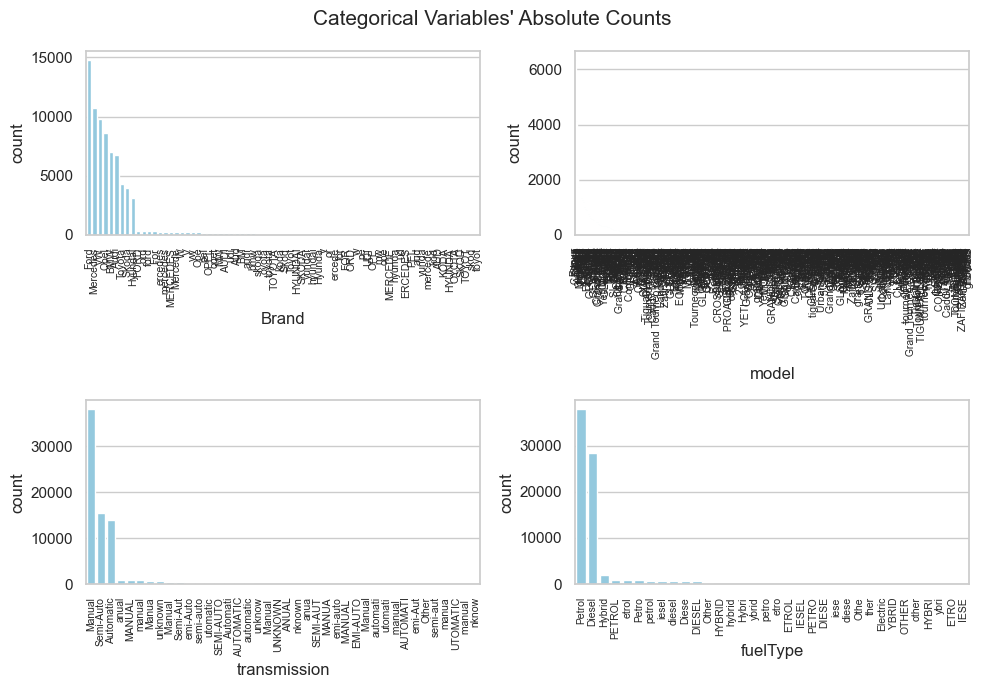

In [194]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(
    2, 
    ceil(len(categorical_features) / 2), 
    figsize=(10, 7)
    )

for ax, feat in zip(axes.flatten(), categorical_features):
    sns.countplot(x=df_train[feat], ax=ax, 
                  order=df_train[feat].value_counts().index, color = 'skyblue') 
    ax.tick_params(axis='x', rotation=90, labelsize='7.5')  


plt.suptitle("Categorical Variables' Absolute Counts", fontsize=15)

plt.tight_layout()
plt.show()

With these plots we can further visualize the problems in the categorical variables: a large amount of classes, most with very low frequency and similar names. We will fix this in Data Preparation.

### **Association between variables**

To evaluate the association between categorical (nominal) variables we will perfom the chi-squared test. 

H0: There is no evidence of a statistically significant association.

H1: There is a statistically significant association between the variables.

Interpretation:
- if p_value < 0.05 (significance level): Reject H0, so there is a statistically significant association between the {var1} and {var2}.
- if p_value >= 0.05 (significance level): Do not reject H0, so there is no evidence of a statistically significant association.

In [195]:
association_results = pd.DataFrame(columns=categorical_features, index=categorical_features)

def color_pvalues(val):

    """
    Applies color formatting to p-values for visualization in tables.

    The function returns a string that can be used with pandas 'DataFrame.style' to visually indicate statistical significance:
    - Green background if p-value < 0.05, indicating a significant association.
    - Red background if p-value >= 0.05, indicating no significant association.
    - Black text color and a black border are applied in both cases.

    Parameters
    ----------
    val : float
        The p-value to be evaluated.

    Returns
    -------
    str
        A string that can be used to style a pandas DataFrame cell.
    """

    if val < 0.05:
        return 'background-color: lightgreen; color:black; border: 1px solid black;'
    else:
        return 'background-color: lightcoral; color:black; border: 1px solid black;'

for var1 in categorical_features:
    for var2 in categorical_features:
        #Chi-square test between {var1} and {var2}

        contingency_table = pd.crosstab(df_train[var1], df_train[var2]) # Create the contingency table
        result = chi2_contingency(contingency_table) # Perform the Chi-square test
                                                    #Chi-square Statistic: result[0]
                                                    #p-value: result[1]
                                                    #Degrees of Freedom: result[2]
                                                    #Expected Frequencies: result[3]
        association_results.loc[var1, var2] = result[1]

association_results= association_results.style.map(color_pvalues)
display(association_results)

,Brand,model,transmission,fuelType
Brand,0.000000,0.000000,0.000000,0.000000
model,0.000000,0.000000,0.000000,0.000000
transmission,0.000000,0.000000,0.000000,0.000000
fuelType,0.000000,0.000000,0.000000,0.000000


To measure their association we will use Cramer's V (suitable for nominal variables).

**Cramer's V = √(X2/N) / min(C-1, R-1)**

X2- Chi- squared statistics;

N- Total number of observations;

C- Number of columns in the contingency table;

R- Number of rows in the contingency table.

In [196]:
cramer_v_table = pd.DataFrame(columns=categorical_features, index = categorical_features)

for var1 in cramer_v_table.columns:
    for var2 in cramer_v_table.index:

        contingency_table = pd.crosstab(df_train[var1], df_train[var2])
        result = chi2_contingency(contingency_table)        

        # Calculate Cramer's V
        X2 = result[0]
        n = df_train.shape[0]
        minimum_dimension = min(df_train[var1].nunique(), df_train[var2].nunique())-1
        cramer_v_table.loc[var1, var2] = np.sqrt((X2/n) / minimum_dimension)

def color_cramervalues(val):

    """
    Applies color formatting to Cramér's V values for visualization in tables.

    The function returns a string that can be used with pandas 'DataFrame.style' to visually indicate the strength of association between categorical variables:
    - Green background if Cramér's V > 0.6, indicating a strong association.
    - Red background if Cramér's V <= 0.6, indicating a weak or moderate association.
    - Black text color and a black border are applied in both cases.

    Parameters
    ----------
    val : float
        The Cramér's V value to be evaluated.

    Returns
    -------
    str
        A string that can be used to style a pandas DataFrame cell.
    """

    if val > 0.6:
        return 'background-color: lightgreen; color:black; border: 1px solid black;'
    else:
        return 'background-color: lightcoral; color:black; border: 1px solid black;'


cramer_v_table= cramer_v_table.style.map(color_cramervalues)
display(cramer_v_table)

,Brand,model,transmission,fuelType
Brand,0.989939,0.338708,0.097623,0.099330
model,0.338708,0.989966,0.140960,0.192912
transmission,0.097623,0.140960,0.989933,0.071666
fuelType,0.099330,0.192912,0.071666,0.990006


The strength of the associations is low due to the number of typos that exist. 

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Numerical Variables </strong>
</h3>


In [197]:
df_train = df_train.set_index ('carID')
df_test = df_test.set_index ('carID')

In [198]:
numeric_features = df_train.columns.drop(categorical_features)

In [199]:
df_train.describe()

,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


Mileage, tax, mpg, engineSize and previousOwners have negative values which isnt logical. There are observations with paintQuality% higher than 100 and the maximum year is 2024.12 when the data set is only until 2020.

### **Histograms**

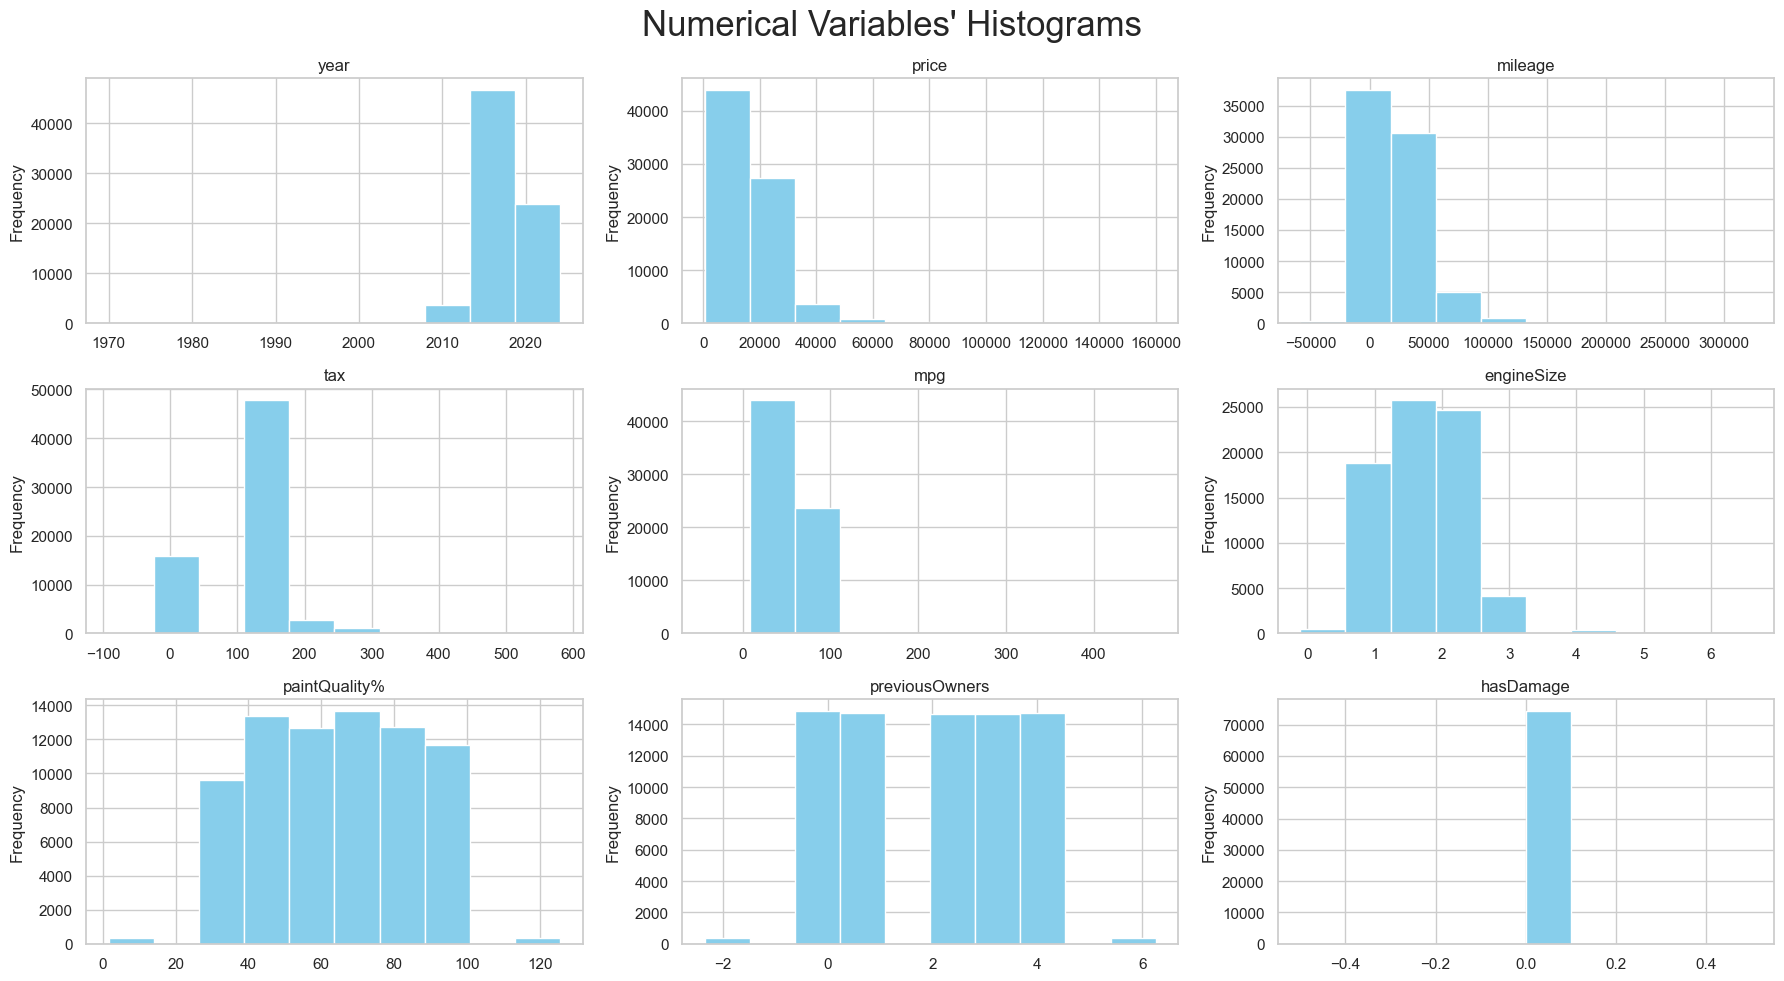

In [200]:
# We will put all the numeric variables' histograms in one figure

fig, axes = plt.subplots(ceil(len(numeric_features) / 3 ), 3, figsize=(18, 10))

for ax, feat in zip(axes.flatten(), numeric_features):
    ax.hist(df_train[feat], color = 'skyblue')
    ax.set_title(feat)
    ax.set_ylabel('Frequency')

# Delete empty plots
for ax in axes.flatten()[len(numeric_features):]:
    ax.axis('off')  


plt.suptitle("Numerical Variables' Histograms", fontsize=25)

plt.tight_layout()
plt.show()

Price and mileage have a similar distribution. 

### **Boxplots**

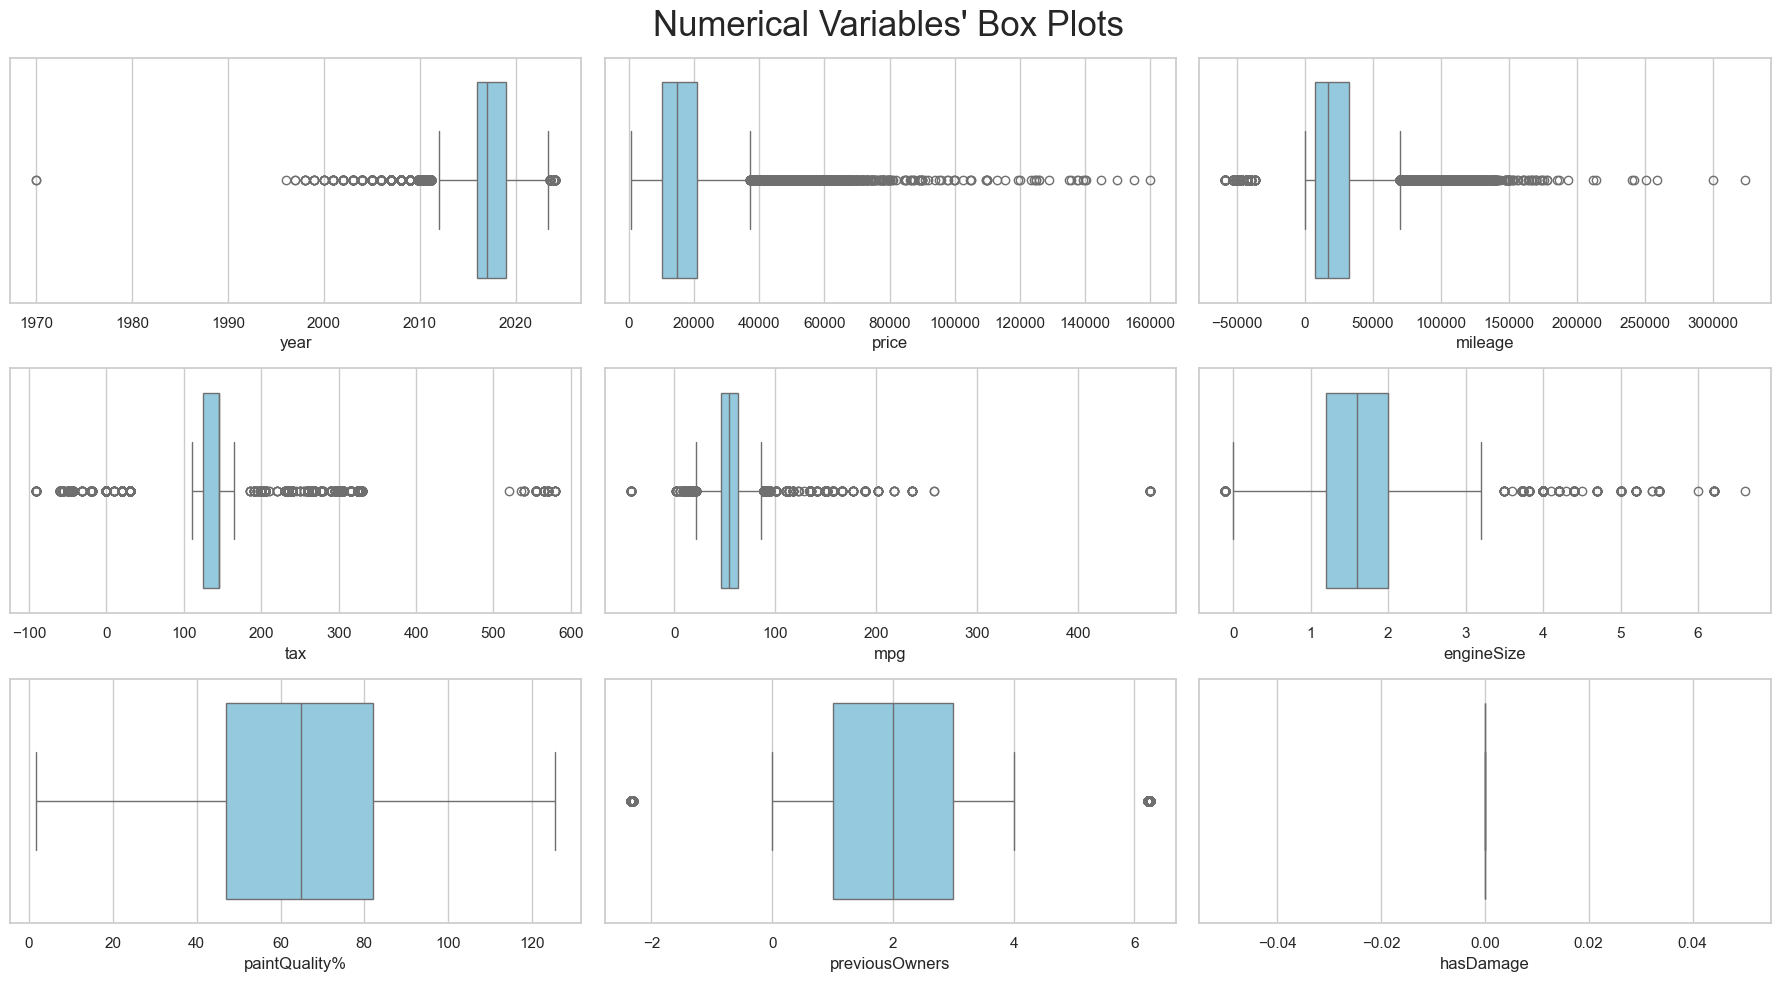

In [201]:

fig, axes = plt.subplots(ceil(len(numeric_features) / 3 ), 3, figsize = (18,10))

for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(x=df_train[feat], ax=ax, color='skyblue')

# Delete empty plots
for ax in axes.flatten()[len(numeric_features):]:
    ax.axis('off')

plt.suptitle("Numerical Variables' Box Plots", fontsize=25)

plt.tight_layout()
plt.show()

The variables in the first 2 rows show multiple outliers

In [202]:
df_train['hasDamage'].unique()

array([ 0., nan])

Analysing the histograms and boxplots above, the first issues we encounter in the numerical features in the dataset are:

- float years and years above 2020 (the data base is from 2020);
- negative mileage values;
- negative tax values;
- negative/zero mpg values;
- paint quality values above 100%
- negative/zero engine sizes;
- previous owners with negative/float values;

We consider all of these values to be invalid within the context of each of these features. 

Additionally, there is a significant presence of outliers is most variables, except for paintQuality% and hasDamage. The other features show very extreme outliers which results in a compressed distribution.

hasDamage is a particular case: it only contains two values, zero or NA. Hence, its boxplot consists of a single straight line at zero. Since according to the metadata this is a boolean variable, we will assume that zero hasDamage values correspond to cars with no damage and that the missing values correspond to cars with damage.

### **Correlations**

To measure the correlation between numerical variables we decided to use Spearman's coefficient, as it captures monotonic associations, not just linear ones. 

In [203]:
corr = df_train[numeric_features].corr(method="spearman")
corr = corr.round(2)
corr

,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
year,1.00,0.60,-0.78,0.32,-0.31,-0.04,0.00,0.00,NaN
price,0.60,1.00,-0.51,0.31,-0.39,0.56,0.00,-0.00,NaN
mileage,-0.78,-0.51,1.00,-0.25,0.32,0.10,-0.00,0.00,NaN
tax,0.32,0.31,-0.25,1.00,-0.55,0.16,0.00,-0.00,NaN
mpg,-0.31,-0.39,0.32,-0.55,1.00,-0.20,0.00,0.00,NaN
engineSize,-0.04,0.56,0.10,0.16,-0.20,1.00,0.00,0.00,NaN
paintQuality%,0.00,0.00,-0.00,0.00,0.00,0.00,1.00,-0.01,NaN
previousOwners,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.01,1.00,NaN
hasDamage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


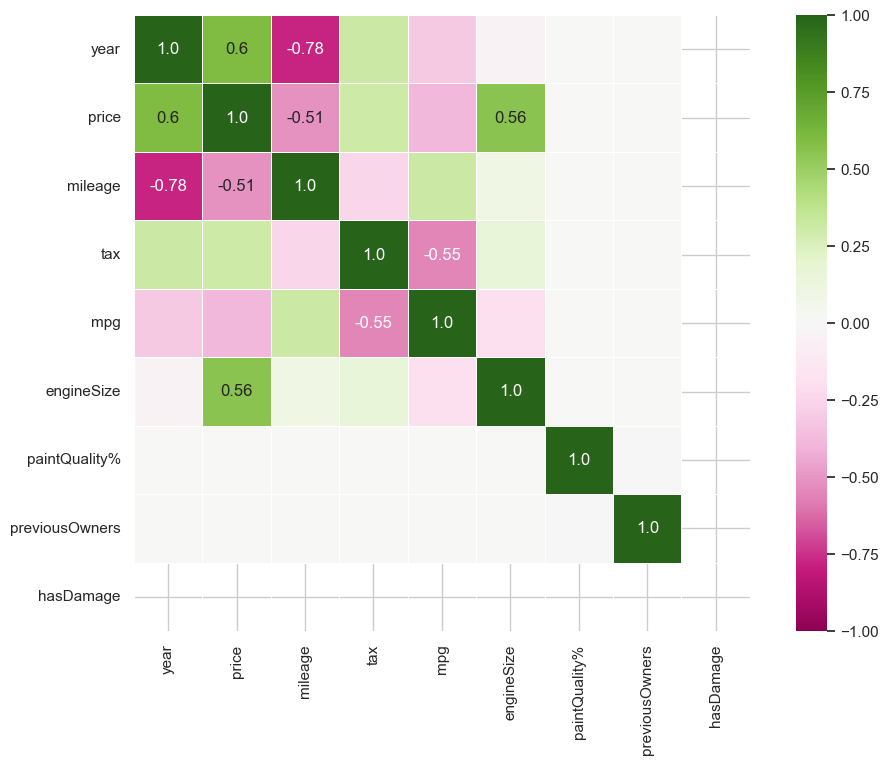

In [204]:

fig = plt.figure(figsize=(12, 8))

mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 


# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot, # Specify custom annotation
            fmt='s', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, 
            center=0, # Center the colormap at zero
            square=True, # Make each cell square-shaped
            linewidths=.5, # Add lines between cells
            cmap='PiYG' # Diverging color map
            )

plt.show()


'previousOwners' and 'paintQuality%' present almost no correlation with the remaining variables, which indicates some degree of irrelevance.

'mileage' and 'year' show strong correlation (in opposite directions).

'mpg' and 'tax' show medium correlation (in opposite directions).

'mpg' and 'year', 'tax' and 'mileage', 'tax' and 'year' show medium-low correlation.

'year', 'mileage' and 'engineSize' show the highest correlation with the target variable, 'price'.

The value of the correlations is probably very affected by the large amount of outliers, missing values and systematic errors.

### **Scatter Plots**


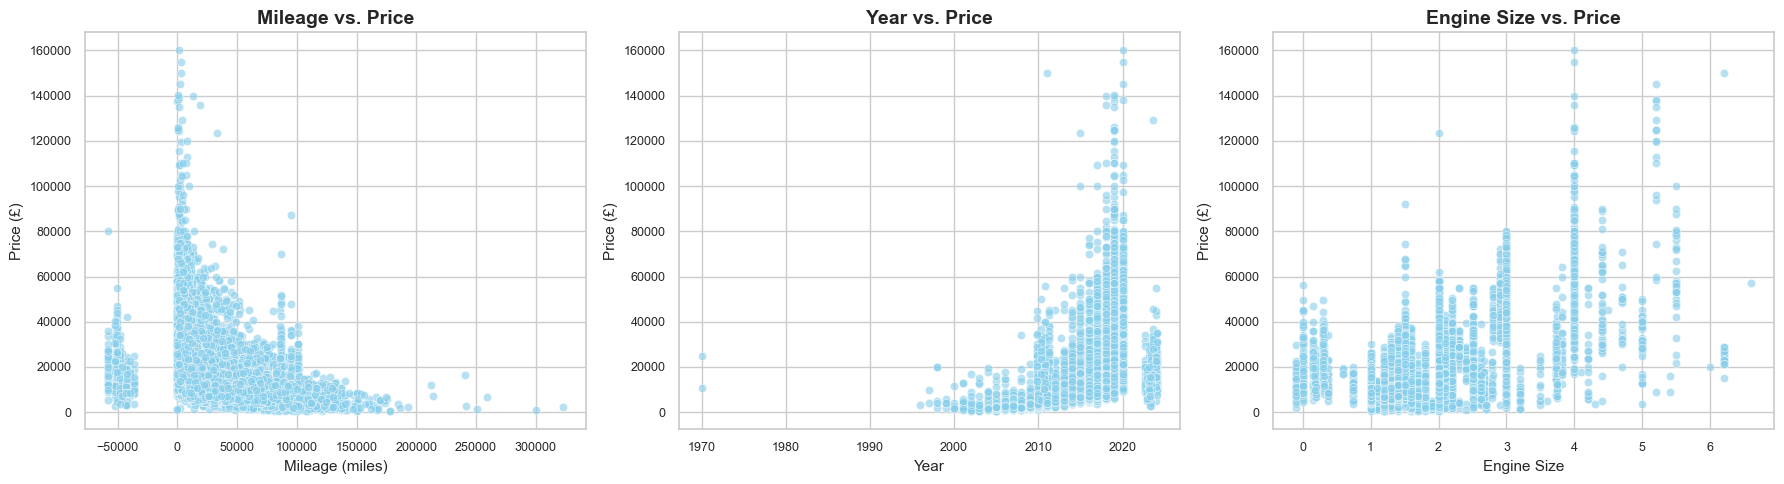

In [205]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables = ['mileage', 'year', 'engineSize']
titles = ['Mileage vs. Price', 'Year vs. Price', 'Engine Size vs. Price']
xlabels = ['Mileage (miles)', 'Year', 'Engine Size']

for i, (var, title, xlabels) in enumerate(zip(variables, titles, xlabels)):
    sns.scatterplot( data=df_train, x=var, y='price', ax=axes[i], alpha=0.6, color='skyblue' )
    
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel(xlabels, fontsize=11)
    axes[i].set_ylabel('Price (£)', fontsize=11)
    axes[i].tick_params(axis='both', labelsize=9)

plt.tight_layout()
plt.show()

The scatter plots are very noisy, as the data has not been treated yet. We can still spot the issues mentioned above.

Nonetheless, as expected, there is a large increase in price for cars with less mileage and older cars are cost less than more recent cars. When it comes to engine size, there seems to be an increase in price as the size increases, although more subtle than the year and mileage patterns.


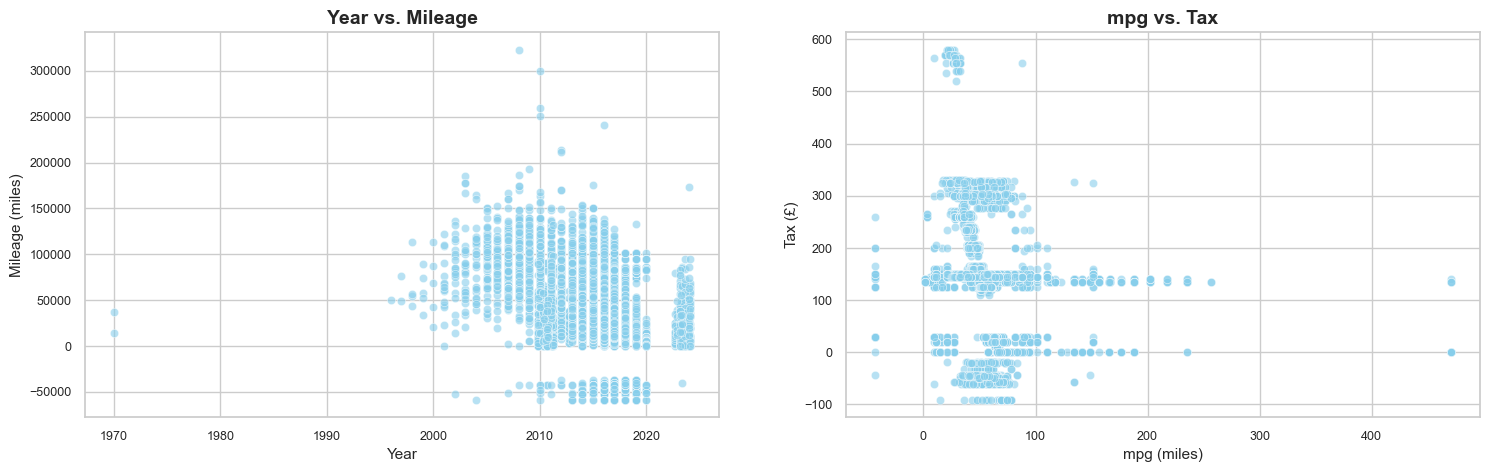

In [206]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.scatterplot(data=df_train, x='year', y='mileage', ax=axes[0], alpha=0.6, color='skyblue')
axes[0].set_title('Year vs. Mileage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('Mileage (miles)', fontsize=11)
axes[0].tick_params(axis='both', labelsize=9)

sns.scatterplot(data=df_train, x='mpg', y='tax', ax=axes[1], alpha=0.6, color='skyblue')
axes[1].set_title('mpg vs. Tax', fontsize=14, fontweight='bold')
axes[1].set_xlabel('mpg (miles)', fontsize=11)
axes[1].set_ylabel('Tax (£)', fontsize=11)
axes[1].tick_params(axis='both', labelsize=9)



Again, the data is very noisy and in th Year vs. Mileage and mpg vs. Tax scatter plots it is harder to spot a pattern. 

##
<h3 id="5th-bullet" style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> 2.3 Data Preparation </strong>
</h3>


We will now perform some pre-processing of the variables to facilitate their treatment within the implementation of the hold-out method.

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Clean and pre-process the data </strong>
</h3>

As mentioned before, we are faced with the following challenges:

- years above 2020 (the data base is from 2020);
- negative mileage values;
- negative tax values;
- negative/zero mpg values;
- paint quality values above 100%
- negative/zero engine size;
- previous owners with negative values;

We consider all of these values to be invalid within the context of each of these features and treat them as missing values.

In [207]:
invalid_train = ((df_train['year']>2020) | (df_train['mileage']<0) | (df_train['tax']<0) | 
           (df_train['mpg']<=0) | (df_train['paintQuality%']>100) | (df_train['previousOwners']< 0) | (df_train['engineSize']<= 0))


invalid_ratio = round(df_train[invalid_train].shape[0]/ df_train.shape[0] * 100,2)

print(f"Rows with invalid values account for {invalid_ratio}% of the original train set.")

Rows with invalid values account for 2.78% of the original train set.


In [208]:
df_train.loc[df_train['year']>2020, 'year'] = np.nan
df_test.loc[df_test['year']>2020, 'year'] = np.nan

df_train.loc[df_train['mileage']<0, 'mileage'] = np.nan
df_test.loc[df_test['mileage']<0, 'mileage'] = np.nan

df_train.loc[df_train['tax']<0, 'tax'] = np.nan
df_test.loc[df_test['tax']<0,'tax'] = np.nan

df_train.loc[df_train['mpg']<=0, 'mpg'] = np.nan
df_test.loc[df_test['mpg']<=0, 'mpg'] = np.nan

df_train.loc[df_train['paintQuality%']>100, 'paintQuality%'] = np.nan
df_test.loc[df_test['paintQuality%']>100, 'paintQuality%'] = np.nan

df_train.loc[df_train['previousOwners']< 0, 'previousOwners'] = np.nan
df_test.loc[df_test['previousOwners']< 0, 'previousOwners'] = np.nan

df_train.loc[df_train['engineSize']<= 0, 'engineSize'] = np.nan
df_test.loc[df_test['engineSize']<= 0, 'engineSize'] = np.nan


Additionally, years and previous owners should be whole numbers, so we will round them using the floor function and typecast them into integers.

In [209]:
df_train['year'] = np.floor(df_train['year'])
df_train['previousOwners'] = np.floor(df_train['previousOwners'])

df_test['year'] = np.floor(df_test['year'])
df_test['previousOwners'] = np.floor(df_test['previousOwners'])

There are two other issues:

- really low mpg values (a good standard value for cars from after the 2000s should be around 40 mpg); for example the minimum year for cars below 15 mpg in our dataset is 2005, which is not feasible.

- really small engine sizes: a minimum standard value should be 1 L;

For these reasons, we will replace mpg values below 40 and engine sizes below 1 L with missing values to be treated later.

In [210]:
df_train.loc[df_train['mpg']<15, 'year'].describe()

count     194.000000
mean     2017.494845
std         2.292695
min      2005.000000
25%      2016.000000
50%      2018.000000
75%      2019.000000
max      2020.000000
Name: year, dtype: float64

In [211]:
df_train.loc[df_train['mpg'] < 40, 'mpg'] = np.nan
df_train.loc[df_train['engineSize'] < 1, 'engineSize'] = np.nan

df_test.loc[df_test['mpg'] < 40, 'mpg'] = np.nan
df_test.loc[df_test['engineSize'] < 1, 'engineSize'] = np.nan

We'll also round the floats to two decimal places.

In [212]:
for feat in ['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%']:
    df_train[feat] = df_train[feat].round(2)
    df_test[feat] = df_test[feat].round(2)

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Pre-Processing of Categorical Variables </strong>
</h3>

Pre-processing the categorical variables will allow for an easier treatment. Therefore, we will transform all the categorical features into strings, strip them of leading and trace spaces and convert them to upper case.

In [213]:
# Pre processing the categorical variables to be easier to find clusters in typos:
    # remove spaces (at the beginning and end) and uppercase all letters
    # does not replace NaN's
df_train['Brand'] = df_train['Brand'].where(df_train['Brand'].isna(), df_train['Brand'].astype(str).str.strip().str.upper())
df_test['Brand']  = df_test['Brand'].where(df_test['Brand'].isna(), df_test['Brand'].astype(str).str.strip().str.upper())

df_train['model'] = df_train['model'].where(df_train['model'].isna(), df_train['model'].astype(str).str.strip().str.upper())
df_test['model']  = df_test['model'].where(df_test['model'].isna(), df_test['model'].astype(str).str.strip().str.upper())

df_train['fuelType'] = df_train['fuelType'].where(df_train['fuelType'].isna(), df_train['fuelType'].astype(str).str.strip().str.upper())
df_test['fuelType']  = df_test['fuelType'].where(df_test['fuelType'].isna(), df_test['fuelType'].astype(str).str.strip().str.upper())

df_train['transmission'] = df_train['transmission'].where(df_train['transmission'].isna(), df_train['transmission'].astype(str).str.strip().str.upper())
df_test['transmission']  = df_test['transmission'].where(df_test['transmission'].isna(), df_test['transmission'].astype(str).str.strip().str.upper())

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Hold-Out Method </strong>
</h3>

For this deliverable, we will be implementing a linear regression model through the hold-out method. 

We start by separating the target variable from the remaining variables and then splitting both sets into train and validation sets, using train_test_split from sklearn. We will use a 80%-20% train-validation proportion for this. 

In [214]:
target = df_train['price']
data = df_train.drop(['price'],axis=1)

In [215]:
X_train, X_val, y_train, y_val = train_test_split(data, 
                                                 target, 
                                                 test_size=0.3, 
                                                 random_state=15, 
                                                 shuffle=True)

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Treatment of Categorical Variables </strong>
</h3>

##### *Brands*

In [216]:
brands = X_train['Brand'].dropna().unique().tolist()
print(f" Typos in brands: {brands}")

 Typos in brands: ['MERCEDES', 'VW', 'AUDI', 'FORD', 'TOYOTA', 'BMW', 'SKODA', 'OPEL', 'HYUNDAI', 'OPE', 'W', 'BM', 'KODA', 'PEL', 'TOYOT', 'OYOTA', 'V', 'ERCEDES', 'UDI', 'FOR', 'SKOD', 'MERCEDE', 'HYUNDA', 'ORD', 'YUNDAI', 'AUD', 'MW', 'ERCEDE', 'OR', 'PE', 'UD', 'KOD', 'YUNDA']


In Brands we have the value 'W' which could mean VW or BMW. 

In [217]:

# Correct the  'W' values in the columns 'Brand' by applying the sfunction correct_brand_w to all elements in the column
X_train['Brand'] = X_train.apply(lambda row: correct_brand_w(X_train, row['Brand'], row['model']),axis=1)

VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW


In [218]:
X_val['Brand'] = X_val.apply(lambda row: correct_brand_w(X_val, row['Brand'], row['model']), axis = 1)

VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW


In [219]:
df_test['Brand'] = df_test.apply(lambda row: correct_brand_w(df_test, row['Brand'], row['model']), axis = 1)

VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW
VW


In [220]:
print(f"Train: {X_train[(X_train['Brand']=='W')]}\n\n")
print(f"Validation: {X_val[(X_val['Brand']=='W')]}\n\n")
print(f"Test: {df_test[(df_test['Brand']=='W')]}")

Train:       Brand model    year transmission  mileage fuelType    tax   mpg  \
carID                                                                   
74210     W   NaN  2019.0    SEMI-AUTO   3700.0   DIESEL  145.0  52.3   
66941     W   NaN  2019.0    AUTOMATIC   6000.0      NaN  145.0   NaN   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
74210         2.0           87.0             3.0        0.0  
66941         1.5           70.0             3.0        0.0  


Validation:       Brand model    year transmission  mileage fuelType    tax   mpg  \
carID                                                                   
65456     W   NaN  2019.0       MANUAL   3000.0   DIESEL  145.0  57.7   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
65456         1.6           38.0             2.0        0.0  


Test:        Brand model    ye

We can see that we fixed the problem with the brand 'w' except for the cases with null values, which are only 5 observations. The ones that were fixed were all 'VW' so we will assume the same for these.

In [221]:
X_train.loc[X_train['Brand'] =='W' ,'Brand'] = 'VW'

X_val.loc[X_val['Brand'] =='W' ,'Brand'] = 'VW'

df_test.loc[df_test['Brand'] =='W' ,'Brand'] = 'VW'

print(X_train[X_train['Brand'] =='W'], '\n\n')
print(X_val[X_val['Brand'] =='W'], '\n\n')
print(df_test[df_test['Brand']=='W'])


Empty DataFrame
Columns: [Brand, model, year, transmission, mileage, fuelType, tax, mpg, engineSize, paintQuality%, previousOwners, hasDamage]
Index: [] 


Empty DataFrame
Columns: [Brand, model, year, transmission, mileage, fuelType, tax, mpg, engineSize, paintQuality%, previousOwners, hasDamage]
Index: [] 


Empty DataFrame
Columns: [Brand, model, year, transmission, mileage, fuelType, tax, mpg, engineSize, paintQuality%, previousOwners, hasDamage]
Index: []


For all variables, we will follow the same logic. We will group the typos into clusters based only on the typos from the **training data**. Then, we will correct the errors in training, validation and testing based on the created clusters. If the typo isn't in the clusters we'll try to match it to correct values from train.

Lets correct the typos:

TheFuzz uses the Levenshtein edit distance to calculate the degree of closeness between two strings.

**Levenshtein distance** = at a minimum, how many edits are required to change one string into the other.

In [222]:
brands = X_train['Brand'].dropna().unique().tolist()

In [223]:
set([len(brand) for brand in brands])

{1, 2, 3, 4, 5, 6, 7, 8}

[https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings]

[https://medium.com/@laxmi17sarki/string-matching-using-fuzzywuzzy-24be9e85c88d]

**Ratio choice**: fuzz.WRatio, most robust method

For this purpose we will will use the create_clusters and correct_categorical functions defined in the python script.

In [224]:

clusters, mapping = create_clusters(X_train, brands, 'Brand')

print("Clusters:")
for c in clusters:
    print(c)

X_train['Brand_cleaned'] = X_train['Brand'].apply(lambda x: correct_categorical(mapping, x))
X_val['Brand_cleaned'] = X_val['Brand'].apply(lambda x: correct_categorical(mapping, x))
df_test['Brand_cleaned'] = df_test['Brand'].apply(lambda x: correct_categorical(mapping, x))

print("\nCleaned brand - Train:")
print(X_train['Brand_cleaned'].dropna().unique())

print("\nCleaned brand - Validation:")
print(X_val['Brand_cleaned'].dropna().unique())

print("\nCleaned brand - Test:")
print(df_test['Brand_cleaned'].dropna().unique())


Clusters:
['MERCEDES', 'ERCEDES', 'MERCEDE', 'ERCEDE']
['VW', 'V']
['AUDI', 'UDI', 'AUD', 'UD']
['FORD', 'FOR', 'ORD', 'OR']
['TOYOTA', 'TOYOT', 'OYOTA']
['BMW', 'BM', 'MW']
['SKODA', 'KODA', 'SKOD', 'KOD']
['OPEL', 'OPE', 'PEL', 'PE']
['HYUNDAI', 'HYUNDA', 'YUNDAI', 'YUNDA']

Cleaned brand - Train:
['MERCEDES' 'VW' 'AUDI' 'FORD' 'TOYOTA' 'BMW' 'SKODA' 'OPEL' 'HYUNDAI']

Cleaned brand - Validation:
['BMW' 'OPEL' 'AUDI' 'MERCEDES' 'FORD' 'TOYOTA' 'VW' 'HYUNDAI' 'SKODA']

Cleaned brand - Test:
['HYUNDAI' 'VW' 'BMW' 'OPEL' 'FORD' 'MERCEDES' 'SKODA' 'TOYOTA' 'AUDI']


#### *Transmission*

In [225]:
transmission_types = X_train['transmission'].dropna().unique().tolist()
print(f" Typos in models: {transmission_types}")

 Typos in models: ['SEMI-AUT', 'AUTOMATIC', 'SEMI-AUTO', 'MANUAL', 'MANUA', 'ANUAL', 'AUTOMATI', 'UNKNOW', 'UNKNOWN', 'UTOMATIC', 'EMI-AUTO', 'ANUA', 'NKNOWN', 'OTHER', 'UTOMATI', 'EMI-AUT', 'NKNOW']


In [226]:
# Creates clusters with similar fuel types
clusters, mapping = create_clusters(X_train, transmission_types, 'transmission')

X_train['transmission_cleaned'] = X_train['transmission'].apply(lambda x: correct_categorical(mapping, x))
X_val['transmission_cleaned'] = X_val['transmission'].apply(lambda x: correct_categorical(mapping, x))
df_test['transmission_cleaned'] = df_test['transmission'].apply(lambda x: correct_categorical(mapping, x))

print("Clusters:")
for c in clusters:
    print(c)

print("\nCleaned transmission - Train:")
print(X_train['transmission_cleaned'].dropna().unique())

print("\nCleaned transmission - Validation:")
print(X_val['transmission_cleaned'].dropna().unique())

print("\nCleaned transmission - Test:")
print(df_test['transmission_cleaned'].dropna().unique())

Clusters:
['SEMI-AUT', 'SEMI-AUTO', 'EMI-AUTO', 'EMI-AUT']
['AUTOMATIC', 'AUTOMATI', 'UTOMATIC', 'UTOMATI']
['MANUAL', 'MANUA', 'ANUAL', 'ANUA']
['UNKNOW', 'UNKNOWN', 'NKNOWN', 'NKNOW']
['OTHER']

Cleaned transmission - Train:
['SEMI-AUTO' 'AUTOMATIC' 'MANUAL' 'UNKNOWN' 'OTHER']

Cleaned transmission - Validation:
['SEMI-AUTO' 'MANUAL' 'AUTOMATIC' 'UNKNOWN' 'OTHER']

Cleaned transmission - Test:
['AUTOMATIC' 'SEMI-AUTO' 'MANUAL' 'UNKNOWN' 'OTHER']


#### *Fuel Types*

In [227]:
fuel_types=X_train['fuelType'].dropna().unique().tolist()
print(f" Typos in models: {fuel_types}")

 Typos in models: ['DIESEL', 'PETROL', 'DIESE', 'HYBRID', 'IESEL', 'PETRO', 'ETROL', 'YBRID', 'ELECTRIC', 'IESE', 'OTHER', 'HYBRI', 'ETRO', 'THER', 'OTHE', 'YBRI']


In [228]:
# Creates clusters with similar fuel types
clusters, mapping = create_clusters(X_train, fuel_types, 'fuelType')

X_train['fuelType_cleaned'] = X_train['fuelType'].apply(lambda x: correct_categorical(mapping, x))
X_val['fuelType_cleaned'] = X_val['fuelType'].apply(lambda x: correct_categorical(mapping, x))
df_test['fuelType_cleaned'] =  df_test['fuelType'].apply(lambda x: correct_categorical(mapping, x))

print("Clusters:")
for c in clusters:
    print(c)

print("\nCleaned fuel type - Train:")
print(X_train['fuelType_cleaned'].dropna().unique())

print("\nCleaned fuel type - Validation:")
print(X_val['fuelType_cleaned'].dropna().unique())

print("\nCleaned fuel type - Test:")
print(df_test['fuelType_cleaned'].dropna().unique())

Clusters:
['DIESEL', 'DIESE', 'IESEL', 'IESE']
['PETROL', 'PETRO', 'ETROL', 'ETRO']
['HYBRID', 'YBRID', 'HYBRI', 'YBRI']
['ELECTRIC']
['OTHER', 'THER', 'OTHE']

Cleaned fuel type - Train:
['DIESEL' 'PETROL' 'HYBRID' 'ELECTRIC' 'OTHER']

Cleaned fuel type - Validation:
['DIESEL' 'PETROL' 'HYBRID' 'OTHER']

Cleaned fuel type - Test:
['PETROL' 'DIESEL' 'HYBRID' 'OTHER' 'ELECTRIC']


#### *Models*

In [229]:
models= X_train['model'].dropna().unique().tolist()
print(f"Nº of unique values: {len(models)}")

Nº of unique values: 283


In [230]:
set([len(str(model)) for model in models])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21}

Fuzzywuzzy wasn't able to group the same models in the column 'model', so for this case we will used get_close_matches from the difflib library in another function, similar_models, also defined in the python script.

In [231]:
clusters = similar_models(models)

print("Clusters:")
for c in clusters:
    print(c)

Clusters:
['CLS CLASS', 'CLS CLAS']
['TIGUAN', 'TIGUA']
['PASSAT', 'PASSA']
['GLC CLASS', 'GLC CLAS']
['A5']
['A6']
['AYGO', 'AYG']
['3 SERIES', '3 SERIE']
['FABIA', 'FABI']
['FOCUS', 'FOCU']
['MONDEO', 'MONDE']
['CORSA', 'CORS']
['2 SERIES', '2 SERIE']
['YARIS', 'YARI']
['I30']
['GRAND TOURNEO CONNECT', 'GRAND TOURNEO CONNEC']
['S-MAX', 'S-MA']
['E CLASS', 'E CLAS']
['CROSSLAND X', 'CROSSLAND']
['Q2']
['PRIUS']
['FIESTA', 'FIEST']
['POLO', 'POL']
['I10']
['ASTRA', 'ASTR']
['OCTAVIA', 'OCTAVI']
['Q3']
['GOLF', 'GOL']
['MOKKA X']
['KA+']
['SCALA', 'SCAL']
['ECOSPORT', 'ECOSPOR']
['7 SERIES', '7 SERIE']
['KUGA', 'KUG']
['T-CROSS', 'T-CROS']
['C CLASS', 'C CLAS']
['AURIS', 'AURI']
['PUMA']
['MOKKA', 'MOKK']
['COROLLA', 'COROLL']
['INSIGNIA', 'INSIGNI']
['1 SERIES', '1 SERIE']
['A4']
['GLA CLASS', 'GLA CLAS']
['IONIQ', 'IONI']
['CC']
['COMBO LIFE', 'COMBO LIF']
['8 SERIES', '8 SERIE']
['X1']
['RAV4', 'RAV']
['T-ROC', 'T-RO']
['C-MAX', 'C-MA']
['SL CLASS', 'SL CLAS']
['ZAFIRA', 'ZAFIR']
['V

With correct_column_model we map each model to its most frequent version in the train set using the previous clusters.

In [232]:
# Calculate counts once before the function
model_counts = df_train['model'].value_counts().to_dict()

# List to store the most frequent model in each cluster which will be considered the correct one
correct_models = []

# Dictionary to map each model to its correct version
model_mapping = {}

# For loop to go over all the clusters 
for group in clusters:

    # The best model of each cluster will be the one with the highest count in the train set, it will be added to the correct_models list
    best_model = max(group, key=lambda x: model_counts.get(x, 0))
    correct_models.append(best_model)

    # Map all models in the group to the best model
    for model in group:
        model_mapping[model] = best_model



X_train['model_cleaned'] = X_train['model'].apply(lambda x: correct_column_model(correct_models, model_mapping, x, clusters))
X_val['model_cleaned'] = X_val['model'].apply(lambda x: correct_column_model(correct_models, model_mapping, x, clusters))
df_test['model_cleaned'] =  df_test['model'].apply(lambda x: correct_column_model(correct_models, model_mapping, x,clusters))

In [233]:

print("\nCleaned model - Train:")
print(X_train['model_cleaned'].dropna().unique())

print("\nCleaned model - Validation:")
print(X_val['model_cleaned'].dropna().unique())

print("\nCleaned model - Test:")
print(df_test['model_cleaned'].dropna().unique())


Cleaned model - Train:
['CLS CLASS' 'TIGUAN' 'PASSAT' 'GLC CLASS' 'A5' 'A6' 'AYGO' '3 SERIES'
 'FABIA' 'FOCUS' 'MONDEO' 'CORSA' '2 SERIES' 'YARIS' 'I30'
 'GRAND TOURNEO CONNECT' 'S-MAX' 'E CLASS' 'CROSSLAND X' 'Q2' 'PRIUS'
 'FIESTA' 'POLO' 'I10' 'ASTRA' 'OCTAVIA' 'Q3' 'GOLF' 'MOKKA X' 'KA+'
 'SCALA' 'ECOSPORT' '7 SERIES' 'KUGA' 'T-CROSS' 'C CLASS' 'AURIS' 'PUMA'
 'MOKKA' 'COROLLA' 'INSIGNIA' '1 SERIES' 'A4' 'GLA CLASS' 'IONIQ' 'CC'
 'COMBO LIFE' '8 SERIES' 'X1' 'RAV4' 'T-ROC' 'C-MAX' 'SL CLASS' 'ZAFIRA'
 'VIVA' 'B-MAX' 'CL CLASS' '4 SERIES' 'I800' 'GRANDLAND X' 'KAROQ'
 'SUPERB' 'TOURNEO CUSTOM' 'A CLASS' 'RAPID' 'UP' 'TUCSON' 'A1' 'C-HR'
 'YETI OUTDOOR' 'RS6' 'X5' 'RS3' 'I40' 'X2' 'A3' 'CADDY MAXI LIFE'
 'MERIVA' 'CARAVELLE' 'TOUAREG' 'GRAND C-MAX' 'SUPRA' 'SHARAN' 'KAMIQ'
 'M CLASS' 'GL CLASS' 'Q5' 'I20' 'LAND CRUISER' 'CITIGO' 'GTC' 'KONA'
 'ARTEON' 'GALAXY' 'X3' 'TT' 'Q7' 'KODIAQ' 'YETI' 'VERSO' 'KA' 'M3'
 '5 SERIES' 'ADAM' 'GLE CLASS' 'GLB CLASS' 'AGILA' 'X-CLASS' 'B CLASS'
 'SCI

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Treatment of Numerical Variables </strong>
</h3>

### **Outlier Analysis**

We are now left with outliers, which we will analyse using IQR.

In [234]:
num_feats = ['year', 'mileage', 'tax', 'mpg', 'paintQuality%', 'previousOwners', 'engineSize']

# data frame to assess multi-dimension outliers
outlier_df = pd.DataFrame(False, index=X_train.index, columns=num_feats)
upper_bounds = {}
lower_bounds = {}
# detecting outliers for each numerical feat using IQR method
for feat in num_feats:
    Q1 = X_train[feat].quantile(0.25) 
    Q3 = X_train[feat].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_bounds[feat] = upper # saving IQR bounds of train set to use on validation and test sets
    lower_bounds[feat] = lower

    outlier_mask = ((X_train[feat] < lower) | (X_train[feat] > upper))

    outliers = X_train[outlier_mask]

    print(f"{feat}: {len(outliers)} outliers ({round(len(outliers)/len(X_train),2)}%)\n")


year: 1126 outliers (0.02%)

mileage: 2242 outliers (0.04%)

tax: 14004 outliers (0.26%)

mpg: 563 outliers (0.01%)

paintQuality%: 0 outliers (0.0%)

previousOwners: 0 outliers (0.0%)

engineSize: 421 outliers (0.01%)



In variables where we find it appropriate, we will apply winsorization at either the 1st percentile (for lower-bound IQR outliers), 99th percentile (for upper-bound IQR outliers), or both, affecting 1-2% of data per variable. 

We didn't choose these percentiles taking into account the percentage of outliers within each variable, because if we did, we would end up attributing artificial values to a large amount of outliers that represent genuine values within the context of the dataset.  Instead, we selected these percentiles as to minimize their influence on the model while still addressing extreme values.

- Year: winsorization at 1th percentile:

In [235]:
lower_cap_year = X_train['year'].quantile(0.01)
X_train.loc[X_train['year'] < lower_cap_year,'year'] = lower_cap_year
X_val.loc[X_val['year'] < lower_cap_year,'year'] = lower_cap_year
df_test.loc[df_test['year'] < lower_cap_year,'year'] = lower_cap_year

- Mileage: winsorization at 99th percentile

In [236]:
upper_cap_mile = X_train['mileage'].quantile(0.99)
X_train.loc[X_train['mileage'] > upper_cap_mile,'mileage'] = upper_cap_mile
X_val.loc[X_val['mileage'] > upper_cap_mile,'mileage'] = upper_cap_mile
df_test.loc[df_test['mileage'] > upper_cap_mile,'mileage'] = upper_cap_mile

- Tax: winsorization at 1th and 99th percentile

In [237]:
upper_cap_tax = X_train['tax'].quantile(0.99)
X_train.loc[X_train['tax'] > upper_cap_tax,'tax'] = upper_cap_tax
X_val.loc[X_val['tax'] > upper_cap_tax,'tax'] = upper_cap_tax
df_test.loc[df_test['tax'] > upper_cap_tax,'tax'] = upper_cap_tax

lower_cap_tax = X_train['tax'].quantile(0.01)
X_train.loc[X_train['tax'] < lower_cap_tax,'tax'] = lower_cap_tax
X_val.loc[X_val['tax'] < lower_cap_tax,'tax'] = lower_cap_tax
df_test.loc[df_test['tax'] < lower_cap_tax,'tax'] = lower_cap_tax

- mpg: winsorization at 99th percentile

In [238]:
upper_cap_mpg = X_train['mpg'].quantile(0.99)
X_train.loc[X_train['mpg'] > upper_cap_mpg,'mpg'] = upper_cap_mpg
X_val.loc[X_val['mpg'] > upper_cap_mpg,'mpg'] = upper_cap_mpg
df_test.loc[df_test['mpg'] > upper_cap_mpg,'mpg'] = upper_cap_mpg

In [239]:
upper_cap_engine = X_train['engineSize'].quantile(0.99)
X_train.loc[X_train['engineSize'] > upper_cap_engine,'engineSize'] = upper_cap_engine
X_val.loc[X_val['engineSize'] > upper_cap_engine,'engineSize'] = upper_cap_engine
df_test.loc[df_test['engineSize'] > upper_cap_engine,'engineSize'] = upper_cap_engine

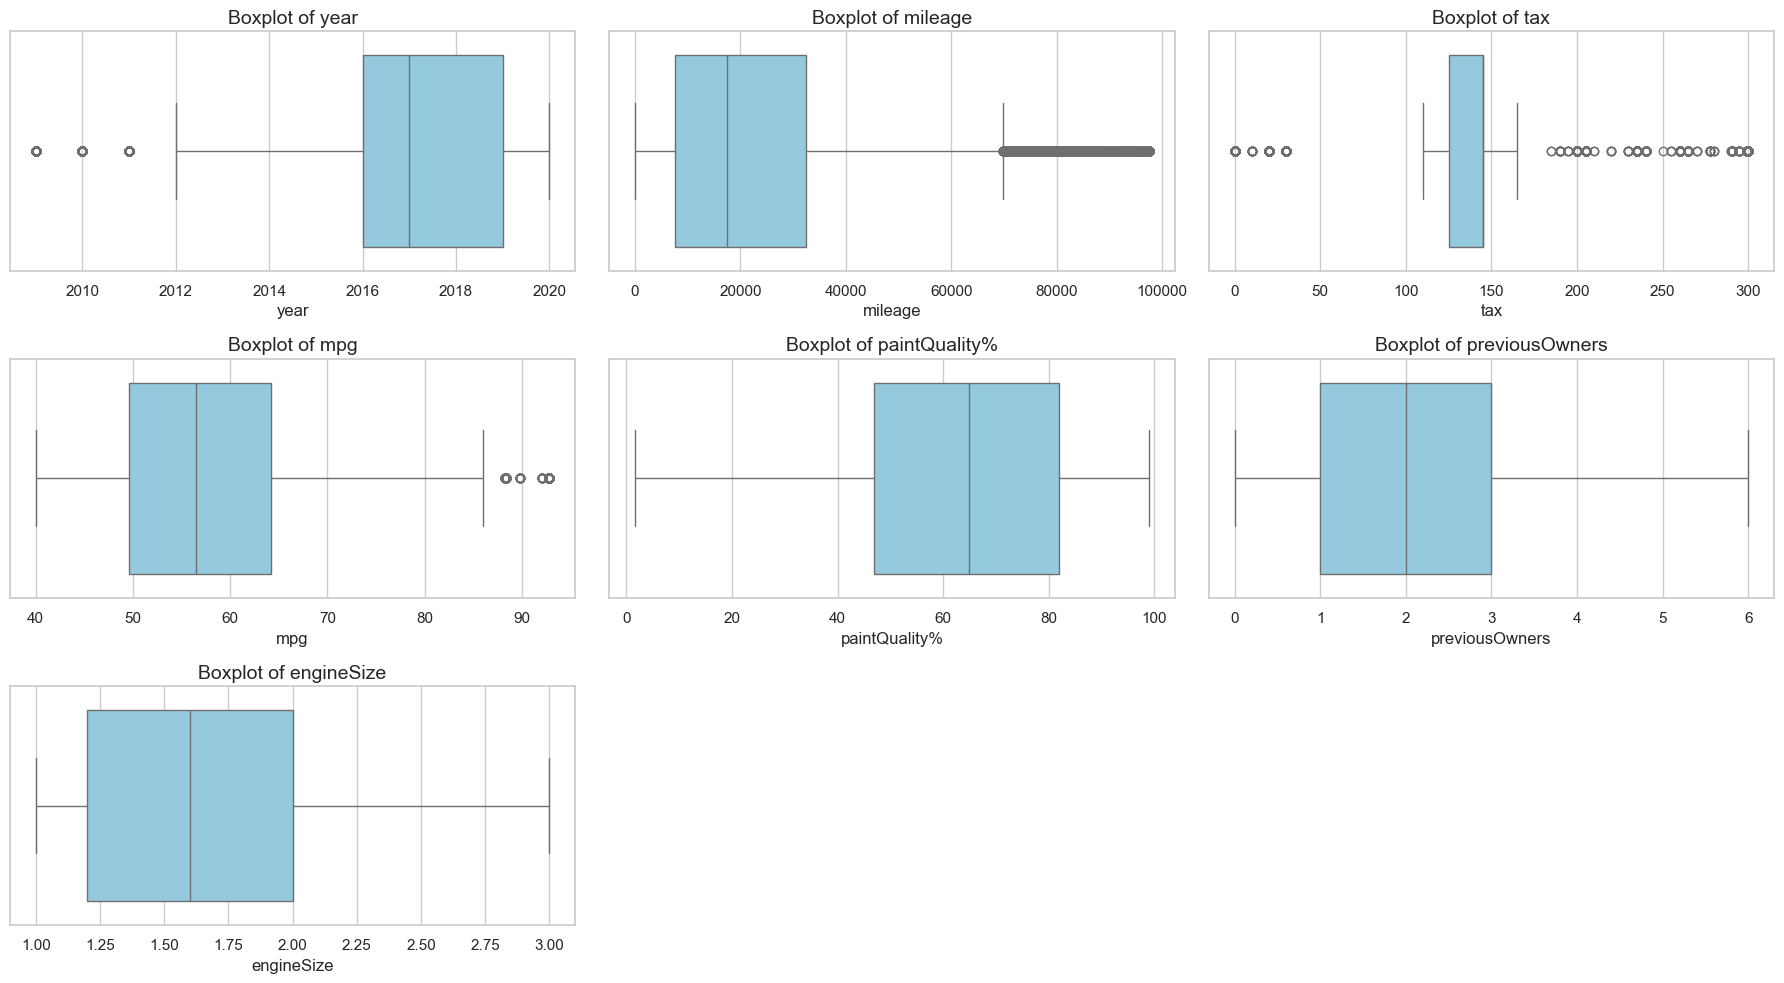

In [240]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(num_feats):
    sns.boxplot(x=X_train[var], ax=axes[i], orient='h', color='skyblue')
    axes[i].set_title(f"Boxplot of {var}", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('')

for i in range(len(num_feats), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Through winsorization we have diminished the amount of outliers, but some prevail. Linear regression will probably be affected by this, but more robust models will not.

### **hasDamage boolean typecasting**

Since hasDamage is described as a boolean variable in the metadata, we will be assuming that cars with zero values in this variable have no damage and that those with missing values are damaged.

In [241]:
X_train['hasDamage'].isna().replace(True, inplace=True)
X_val['hasDamage'].isna().replace(True, inplace=True)
df_test['hasDamage'].isna().replace(True, inplace=True)

X_train['hasDamage'] = X_train['hasDamage'].astype(bool)
X_val['hasDamage'] = X_val['hasDamage'].astype(bool)
df_test['hasDamage'] = df_test['hasDamage'].astype(bool)


##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Visualizing Processed Data </strong>
</h3>

### **Categorical Variables**

We can now visualize the correct bar plots for the categorical variables.

- One-dimensional bar plots

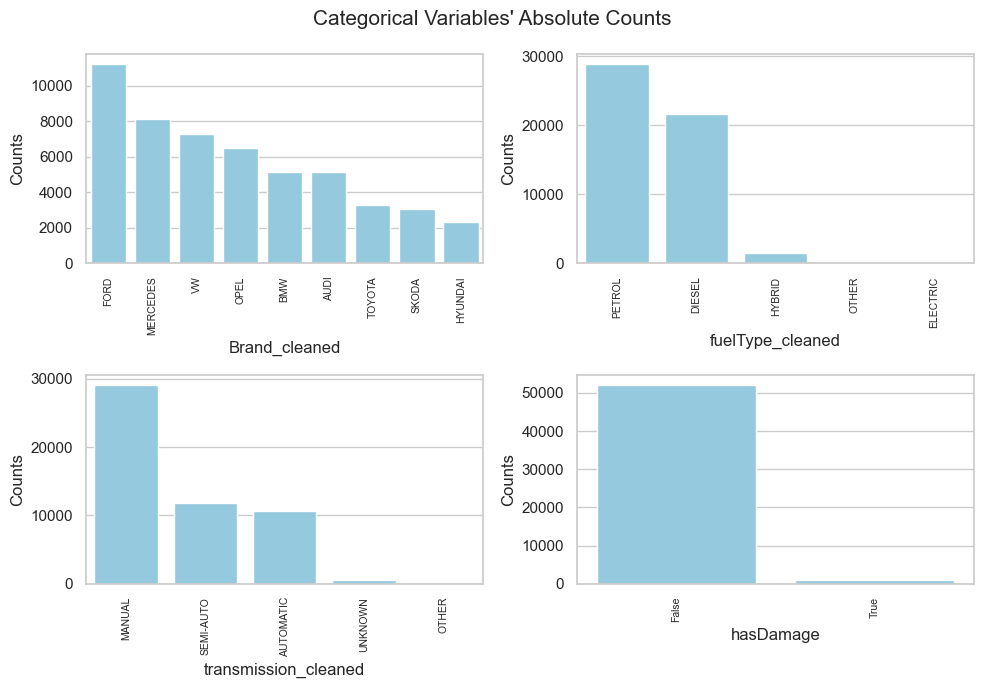

In [242]:
clean_categorical = ['Brand_cleaned', 'fuelType_cleaned', 'transmission_cleaned', 'hasDamage'] # not plotting models as there is a large amount


fig, axes = plt.subplots(
    2, 
    ceil(len(clean_categorical) / 2), 
    figsize=(10, 7)
    )

for ax, feat in zip(axes.flatten(), clean_categorical):
    sns.countplot(x=X_train[feat], ax=ax, 
                  order=X_train[feat].value_counts().index, color = 'skyblue') 
    ax.tick_params(axis='x', rotation=90, labelsize='7.5')  
    ax.set_ylabel('Counts')  


plt.suptitle("Categorical Variables' Absolute Counts", fontsize=15)

plt.tight_layout()
plt.show()

We can now clearly see the distributions across categories:
- most frequent brands are Ford and Mercedes;
- most cars run on petrol and diesel;
- most cars are manual;
- only a very small quantity of cars is damaged.


- Multi-variate bar plots

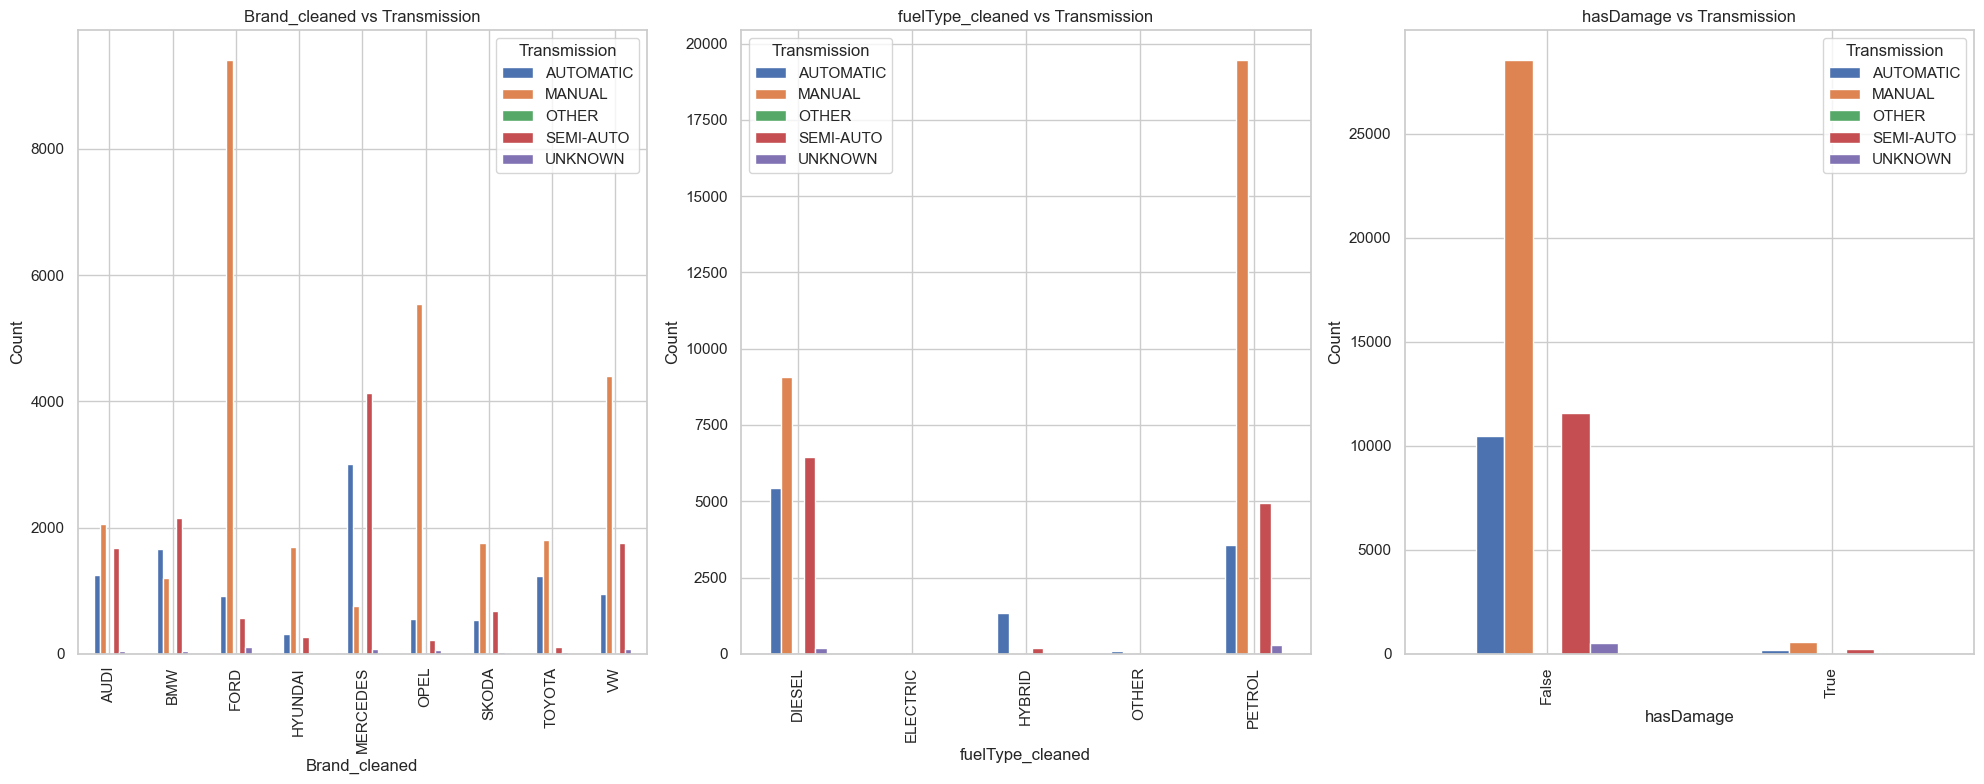

In [243]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))


plot_feats = [x for x in clean_categorical if x not in ['transmission_cleaned']]

for i, var in enumerate(plot_feats):
    
    ct = pd.crosstab(X_train[var], X_train['transmission_cleaned'])
    
    ct.plot(kind='bar', ax=axes[i])
    
    axes[i].set_title(f"{var} vs Transmission")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Transmission')

plt.tight_layout()
plt.show()

From the plots above, we can see the distribution of brands, fuel types and damage across transmission types. From them we can extract the mode of each category. For example, Ford cars are mostly manual while Mercedes cars are mostly semi-automatic. Most cars run on petrol and diesel and most of those are manual, while hybrid cars are mostly automatic.

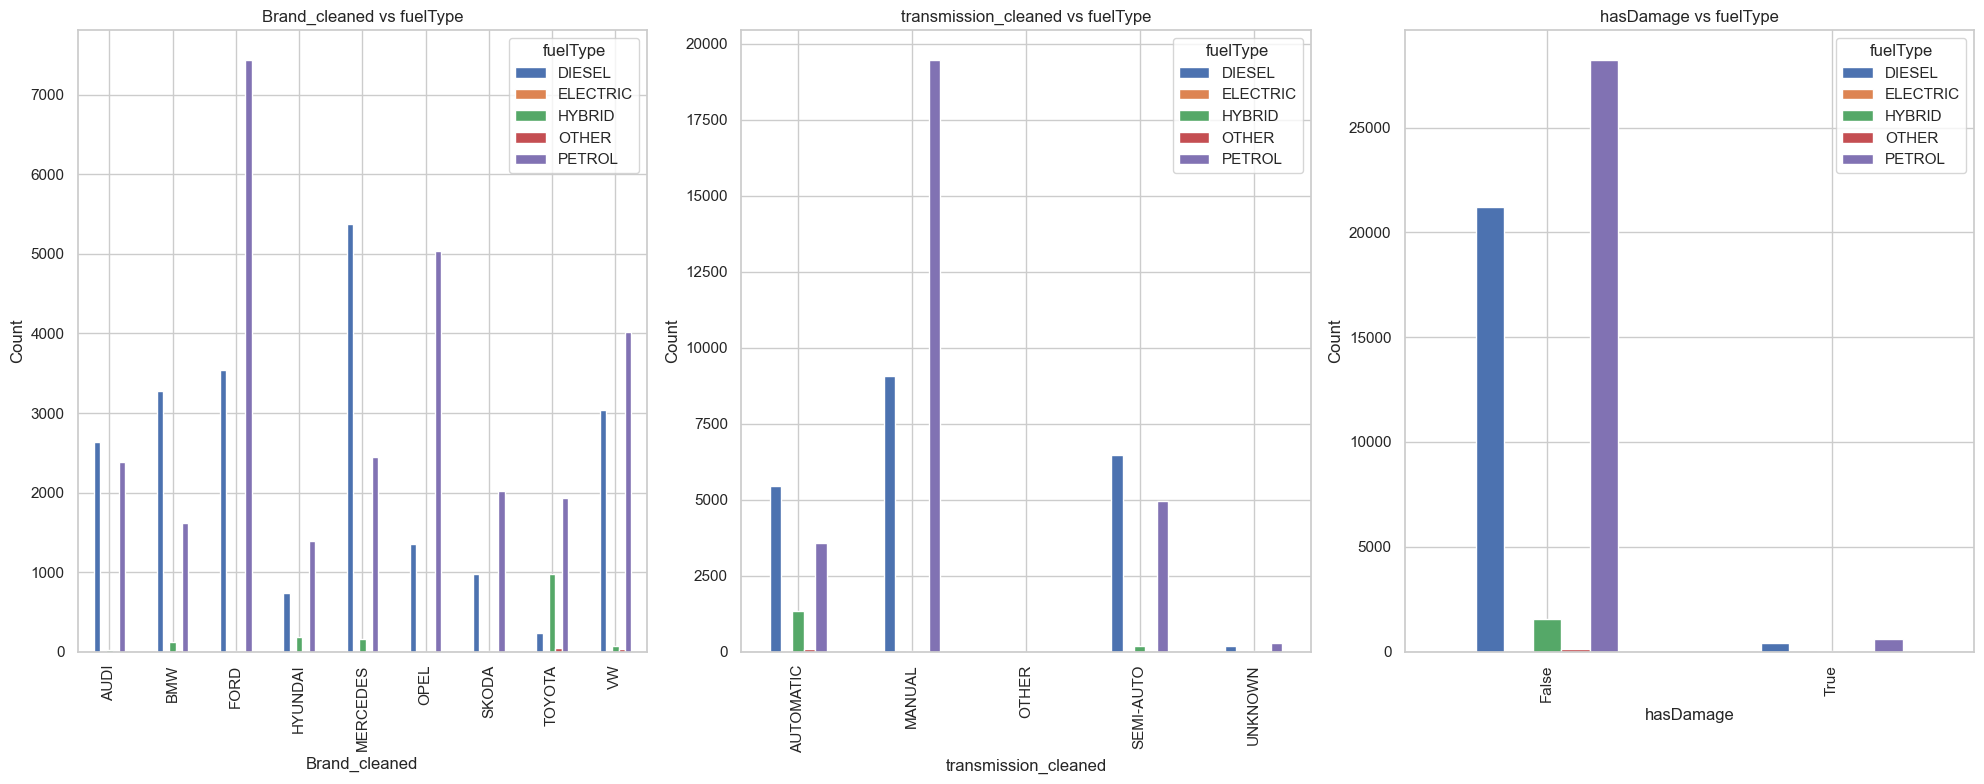

In [244]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))


plot_feats = [x for x in clean_categorical if x not in ['fuelType_cleaned']]

for i, var in enumerate(plot_feats):
    
    ct = pd.crosstab(X_train[var], X_train['fuelType_cleaned'])
    
    ct.plot(kind='bar', ax=axes[i])
    
    axes[i].set_title(f"{var} vs fuelType")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='fuelType')

plt.tight_layout()
plt.show()

In the plots above we can extract similar information. Cars across brands run mostly on petrol and diesel, eg. Ford cars run mostly on petrol while Mercedes cars run mostly on diesel. Toyota has the biggest ammount of hybrid cars.

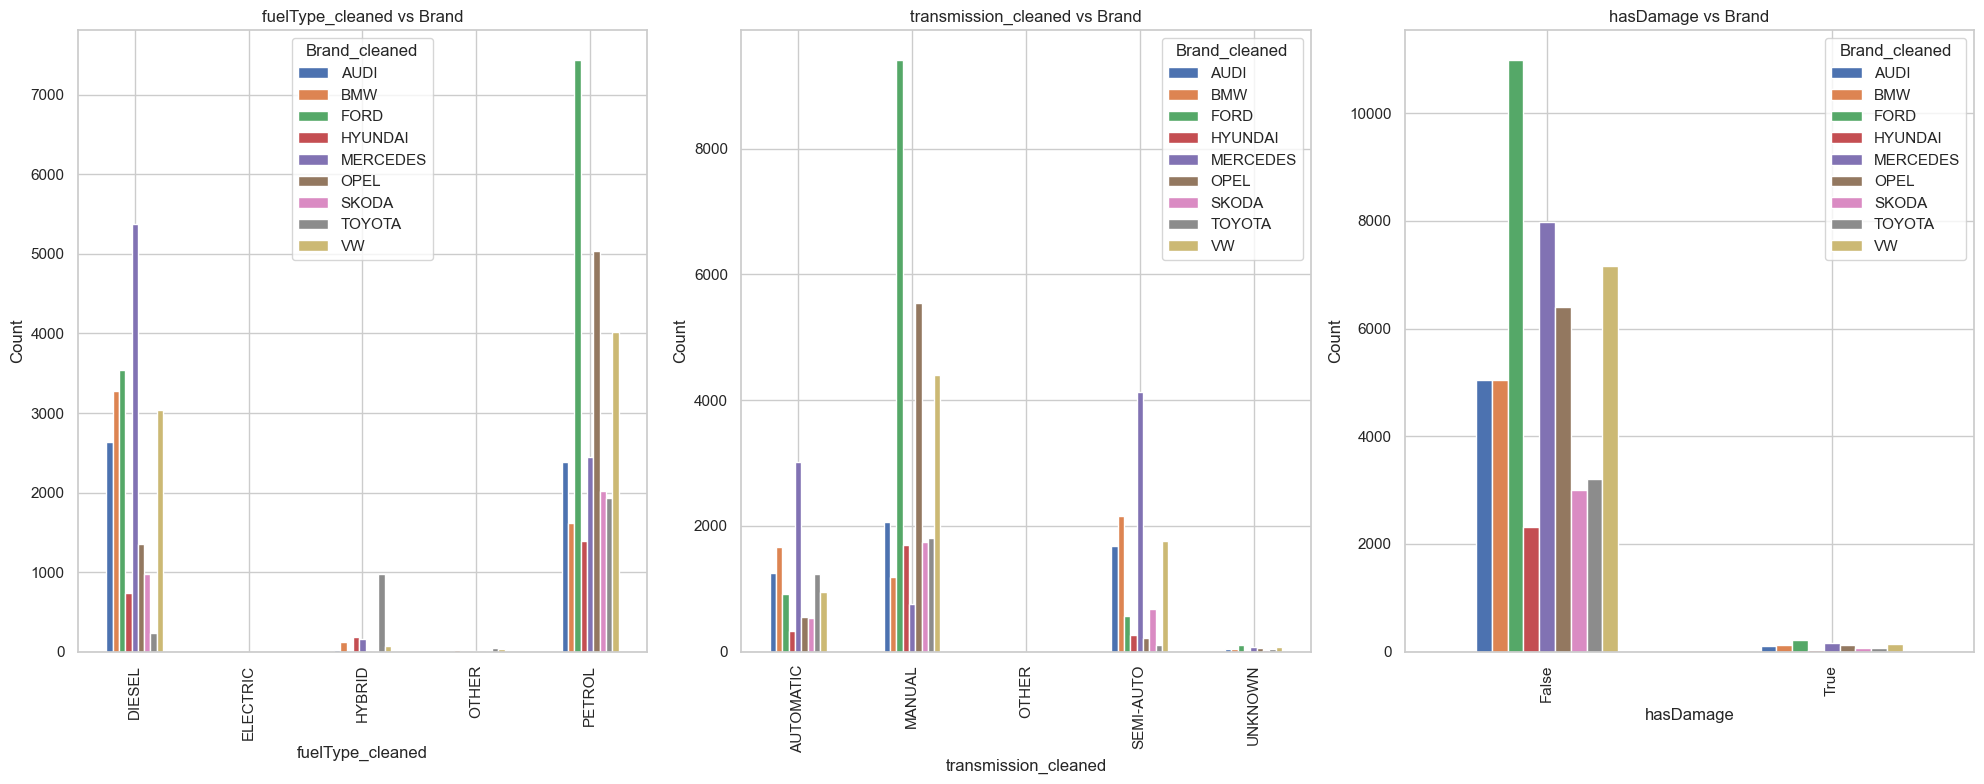

In [245]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# choose categorical features except model & fuelType (you can adjust as needed)
plot_feats = [x for x in clean_categorical if x not in ['Brand_cleaned']]

for i, var in enumerate(plot_feats):
    # cross-tabulate the counts of each category vs transmission type
    ct = pd.crosstab(X_train[var], X_train['Brand_cleaned'])
    
    # plot as grouped bar chart
    ct.plot(kind='bar', ax=axes[i])
    
    axes[i].set_title(f"{var} vs Brand")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

In these plots, we can see the mode for each category across all identified brands:
- most diesel cars are Mercdes and most petrol cars are Ford;
- most manual cars are Ford, automatic and semi-automatic cars are Mercedes;

Performing the Chi-Square test again, we obtain the following results:

In [246]:
clean_categorical.append('model_cleaned')

In [247]:
association_results = pd.DataFrame(columns=clean_categorical, index=clean_categorical)

for var1 in clean_categorical:
    for var2 in clean_categorical:
        #Chi-square test between {var1} and {var2}

        contingency_table = pd.crosstab(X_train[var1], X_train[var2]) # Create the contingency table
        result = chi2_contingency(contingency_table) # Perform the Chi-square test
                                                    #Chi-square Statistic: result[0]
                                                    #p-value: result[1]
                                                    #Degrees of Freedom: result[2]
                                                    #Expected Frequencies: result[3]
        association_results.loc[var1, var2] = result[1]

association_results= association_results.style.map(color_pvalues)
print('P-values:')
display(association_results)

P-values:


,Brand_cleaned,fuelType_cleaned,transmission_cleaned,hasDamage,model_cleaned
Brand_cleaned,0.000000,0.000000,0.000000,0.765990,0.000000
fuelType_cleaned,0.000000,0.000000,0.000000,0.152904,0.000000
transmission_cleaned,0.000000,0.000000,0.000000,0.374794,0.000000
hasDamage,0.765990,0.152904,0.374794,0.000000,0.034370
model_cleaned,0.000000,0.000000,0.000000,0.034370,0.000000


In [248]:
cramer_v_table = pd.DataFrame(columns=clean_categorical, index = clean_categorical)

for var1 in cramer_v_table.columns:
    for var2 in cramer_v_table.index:

        contingency_table = pd.crosstab(X_train[var1], X_train[var2])
        result = chi2_contingency(contingency_table)        

        # Calculate Cramer's V
        X2 = result[0]
        n = df_train.shape[0]
        minimum_dimension = min(X_train[var1].nunique(), X_train[var2].nunique())-1
        cramer_v_table.loc[var1, var2] = np.sqrt((X2/n) / minimum_dimension)

cramer_v_table= cramer_v_table.style.map(color_cramervalues)
print('Cramers V:')
display(cramer_v_table)

Cramers V:


,Brand_cleaned,fuelType_cleaned,transmission_cleaned,hasDamage,model_cleaned
Brand_cleaned,0.828621,0.228101,0.244192,0.008048,0.819116
fuelType_cleaned,0.228101,0.828271,0.164080,0.009387,0.405287
transmission_cleaned,0.244192,0.164080,0.828168,0.007469,0.299962
hasDamage,0.008048,0.009387,0.007469,0.836255,0.053997
model_cleaned,0.819116,0.405287,0.299962,0.053997,0.827150


Brand_cleaned and model_cleaned: the value has increased, which was expected. Each brand has specific models, so it's natural that the association is very high.

Brand_cleaned and fuelType_cleaned / transmission_cleaned: some transmission or fuel patterns are more common in certain brands, but they are not deterministic. The values make sense.

hasDamage with any variable: whether or not a car has damage does not depend on the brand, model, or transmission.

model_cleaned and fuelType_cleaned / transmission_cleaned: different models may have specific fuel or transmission types, so there is some association, but not perfect.

### **Numerical Variables**

- Scatter plots



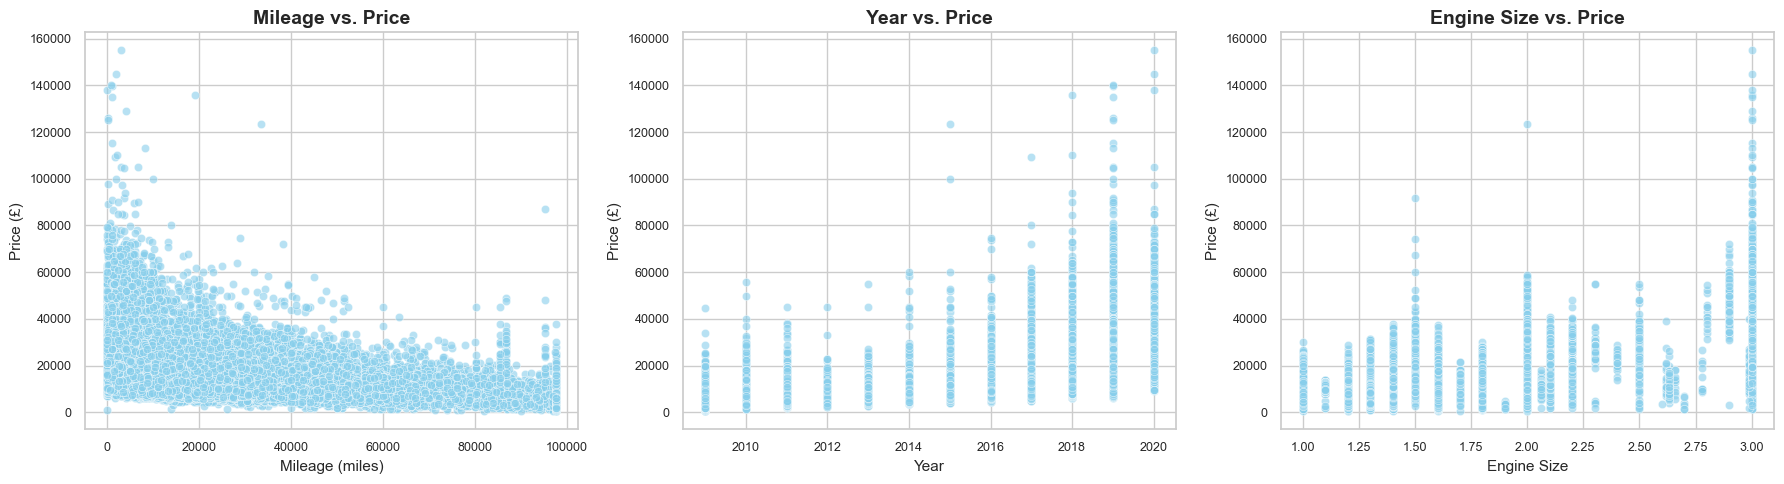

In [249]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables = ['mileage', 'year', 'engineSize']
titles = ['Mileage vs. Price', 'Year vs. Price', 'Engine Size vs. Price']
xlabels = ['Mileage (miles)', 'Year', 'Engine Size']

for i, (var, title, xlabels) in enumerate(zip(variables, titles, xlabels)):
    sns.scatterplot( data=X_train, x=var, y=y_train, ax=axes[i], alpha=0.6, color='skyblue' )
    
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel(xlabels, fontsize=11)
    axes[i].set_ylabel('Price (£)', fontsize=11)
    axes[i].tick_params(axis='both', labelsize=9)

plt.tight_layout()
plt.show()

Now, the scatter plots are not as noisy and the tendency between mileage, year, engine size and the target variable (price) is clearer.

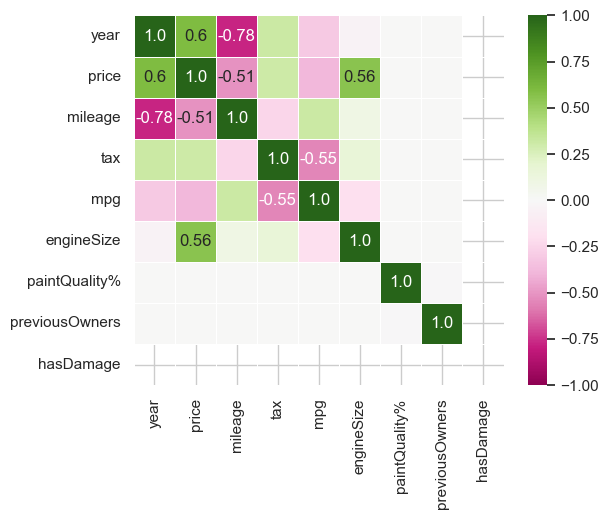

In [250]:

mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, 
                 np.round(corr.values, 2),  
                 np.full(corr.shape, ""))


sns.heatmap(data=corr, 
            annot=annot,
            fmt='', 
            vmin=-1, vmax=1, 
            center=0,
            square=True,
            linewidths=.5,
            cmap='PiYG'
            )

plt.show()




From the Spearman correlation heatmap (after outlier treatment):
- there is a strong correlation between mileage and year in opposite directions;
- price and year show a medium-high correlation;
- price and mileage show a medium correlation in opposite directions;
- engine size and price also show mediumm correlation;
- tax and mpg show an opposite medium correlation.

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Missing Values Treatment </strong>
</h3>

Overall, we are going to impute the missing values in our data set based on either the mode or the median (depending on numerical or categorical variables) of the features that associate the most with the missing variable.

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> Brand </strong>
</h3>

In [251]:
X_train["Brand_cleaned"].isnull().sum()

np.int64(1017)

In [252]:
X_val["Brand_cleaned"].isnull().sum()

np.int64(504)

For missing 'Brand', we make the association with the model. To account for missing values in both 'Brand' and 'Model' we are going to impute the 'Brand' as the mode of all the data set and impute the 'Model' in the following section.

We will use impute_brand.

In [253]:
brand_mode = X_train['Brand_cleaned'].mode().iloc[0]

In [254]:
model_to_brand = (
    X_train.dropna(subset=['Brand_cleaned', 'model_cleaned'])
      .groupby('model_cleaned')['Brand_cleaned']
      .agg(lambda x: x.mode().iloc[0])  # get most frequent brand for each model
      .to_dict()
)

 
X_train['Brand_cleaned'] = X_train.apply(lambda row: impute_brand(row, model_to_brand, brand_mode), axis=1)
X_val['Brand_cleaned'] = X_val.apply(lambda row: impute_brand(row, model_to_brand, brand_mode), axis=1)
df_test['Brand_cleaned'] = df_test.apply(lambda row: impute_brand(row, model_to_brand, brand_mode), axis=1)

In [255]:
X_train['Brand_cleaned'].isnull().sum()

np.int64(0)

In [256]:
X_val["Brand_cleaned"].isnull().sum()

np.int64(0)

In [257]:
df_test["Brand_cleaned"].isnull().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> Model </strong>
</h3>

To impute the model we will use impute_model_flexible, which is defined in the functions python script.

In [258]:
X_train['model_cleaned'].isnull().sum()

np.int64(1202)

In [259]:
X_val['model_cleaned'].isnull().sum()

np.int64(517)

In [260]:
maps = build_model_mappings(X_train)
X_train['model_cleaned'] = X_train.apply(lambda row: impute_model_flexible(row, maps), axis=1)
X_val['model_cleaned'] = X_val.apply(lambda row: impute_model_flexible(row, maps), axis=1)
df_test['model_cleaned'] = df_test.apply(lambda row: impute_model_flexible(row, maps), axis=1)

In [261]:
X_train['model_cleaned'].isnull().sum()

np.int64(0)

In [262]:
X_val['model_cleaned'].isnull().sum()

np.int64(0)

In [263]:
df_test['model_cleaned'].isnull().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> Year </strong>
</h3>

In [264]:
X_train['year'].isnull().sum()

np.int64(1274)

In [265]:
X_val['year'].isnull().sum()

np.int64(575)

‘year’ and ‘mileage’ are highly correlated features, so we are going to use 'mileage' to impute missing values. We are going to create bins of 'very low', 'low', 'average', 'high' and 'very high' mileage, and impute the median of each bin. To account for observations where both 'year' and 'mileage' are missing, we are going to impute the year based on the most correlated features (first tax, then mpg). If they are also missing, we will impute the median of 'year'.

In [266]:
# Create bins based on mileage quantiles
bins = X_train['mileage'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values
labels = ['very low', 'low', 'average', 'high', 'very high']

X_train['mileage_bin'] = pd.cut(X_train['mileage'], bins=bins, labels=labels, include_lowest=True)
X_val['mileage_bin'] = pd.cut(X_val['mileage'], bins=bins, labels=labels, include_lowest=True)
df_test['mileage_bin'] = pd.cut(df_test['mileage'], bins=bins, labels=labels, include_lowest=True)

In [267]:
year_median = X_train['year'].median()

In [268]:
year_map_mileage = (
    X_train.dropna(subset=['year', 'mileage_bin'])
      .groupby('mileage_bin')['year']
      .median()
      .to_dict()
)
year_map_tax = (
    X_train.dropna(subset=['year', 'tax'])
      .groupby('tax')['year']
      .median()
      .to_dict()
)
year_map_mpg = (
    X_train.dropna(subset=['year', 'mpg'])
      .groupby('mpg')['year']
      .median()
      .to_dict()
)

We use impute_year to do the impuation:

In [269]:
X_train['year'] = X_train.apply(lambda row: impute_year(row, year_map_mileage, year_map_tax, year_map_mpg, year_median), axis=1)
X_val['year'] = X_val.apply(lambda row: impute_year(row, year_map_mileage, year_map_tax, year_map_mpg, year_median), axis=1)
df_test['year'] = df_test.apply(lambda row: impute_year(row, year_map_mileage, year_map_tax, year_map_mpg, year_median), axis=1)

In [270]:
X_train['year'].isna().sum()

np.int64(0)

In [271]:
X_val['year'].isna().sum()

np.int64(0)

In [272]:
df_test['year'].isna().sum()

np.int64(0)

In [273]:
X_train.drop('mileage_bin', axis=1, inplace=True)
X_val.drop('mileage_bin', axis=1, inplace=True)
df_test.drop('mileage_bin', axis=1, inplace=True)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> Mileage </strong>
</h3>

In [274]:
X_train['mileage'].isnull().sum()

np.int64(1317)

Given the high correlation between ‘year’ and ‘mileage’, we are going to group the cars by 'year' and impute the median of each year using impute_mileage.

In [275]:
mileage_map = (
    X_train.dropna(subset=['mileage','year'])
      .groupby(['year'])['mileage']
      .median()
      .to_dict()
)

In [276]:
X_train['mileage'] = X_train.apply(lambda row: impute_mileage(row, mileage_map), axis=1)
X_val['mileage'] = X_val.apply(lambda row: impute_mileage(row, mileage_map), axis=1)
df_test['mileage'] = df_test.apply(lambda row: impute_mileage(row, mileage_map), axis=1)

In [277]:
X_train['mileage'].isna().sum()

np.int64(0)

In [278]:
X_val['mileage'].isna().sum()

np.int64(0)

In [279]:
df_test['mileage'].isna().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> Tax </strong>
</h3>

In [280]:
X_train['tax'].isnull().sum()

np.int64(5749)

In [281]:
X_val['tax'].isnull().sum()

np.int64(2533)

For 'tax', we are going to group the cars by model and year and impute the median, as cars of the same model tend to have similar road tax values and the age of the car might also be a factor. For cars that are the only model in a certain year, we are going to impute the median of the model. If we don't have more observations of the same model we are trying to impute, we are going to use the median of the year. We use impute_tax for yhis purpose.

In [282]:
maps = build_tax_mappings(X_train)
X_train['tax'] = X_train.apply(lambda row: impute_tax(row, maps), axis=1)
X_val['tax'] = X_val.apply(lambda row: impute_tax(row, maps), axis=1)
df_test['tax'] = df_test.apply(lambda row: impute_tax(row, maps), axis=1)

In [283]:
X_train['tax'].isnull().sum()

np.int64(0)

In [284]:
X_val['tax'].isnull().sum()

np.int64(0)

In [285]:
df_test['tax'].isnull().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> fuelType </strong>
</h3>

In [286]:
X_train['fuelType_cleaned'].isnull().sum()

np.int64(1061)

In [287]:
X_val['fuelType_cleaned'].isnull().sum()

np.int64(450)

Cars of the same model usually have the same fuel type, so we are going to group the cars by model and impute the mode of the fuel type for each model. If there are no other cars of the same model we are trying to impute, we will use the mode of the brand. Here, we use impute_fueltype.

In [288]:
maps = build_fuel_mappings(X_train)
X_train['fuelType_cleaned'] = X_train.apply(lambda row: impute_fueltype(row, maps), axis=1)
X_val['fuelType_cleaned'] = X_val.apply(lambda row: impute_fueltype(row, maps), axis=1)
df_test['fuelType_cleaned'] = df_test.apply(lambda row: impute_fueltype(row, maps), axis=1)

In [289]:
X_train['fuelType_cleaned'].isna().sum()

np.int64(0)

In [290]:
X_val['fuelType_cleaned'].isna().sum()

np.int64(0)

In [291]:
df_test['fuelType_cleaned'].isna().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> mpg </strong>
</h3>

In [292]:
X_train['mpg'].isnull().sum()

np.int64(10927)

For 'mpg', we are going to group the cars by model and impute the median of each model, as cars of the same model tend to have the same mpg values. If there are no other cars from that model without NaN mpg, we will impute the median of the brand. To do this, we use imput_mpg.

In [293]:
maps = build_mpg_mappings(X_train)
X_train['mpg'] = X_train.apply(lambda row: impute_mpg(row, maps), axis=1)
X_val['mpg'] = X_val.apply(lambda row: impute_mpg(row, maps), axis=1)
df_test['mpg'] = df_test.apply(lambda row: impute_mpg(row, maps), axis=1)

In [294]:
X_train['mpg'].isnull().sum()

np.int64(0)

In [295]:
X_val['mpg'].isnull().sum()

np.int64(0)

In [296]:
df_test['mpg'].isnull().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> engineSize </strong>
</h3>

In [297]:
X_train['engineSize'].isnull().sum()

np.int64(1483)

In [298]:
X_val['engineSize'].isnull().sum()

np.int64(607)

Cars of the same model usually have the same engine size, so we are going to impute missing values based on the median of the model. If there are no other cars from that model, we will impute the median of the brand. For this purpose wee apply impute_engine.

In [299]:
maps = build_engine_mappings(X_train)
X_train['engineSize'] = X_train.apply(lambda row: impute_engine(row, maps), axis=1)
X_val['engineSize'] = X_val.apply(lambda row: impute_engine(row, maps), axis=1)
df_test['engineSize'] = df_test.apply(lambda row: impute_engine(row, maps), axis=1)

In [300]:
X_train['engineSize'].isnull().sum()

np.int64(0)

In [301]:
X_val['engineSize'].isnull().sum()

np.int64(0)

In [302]:
df_test['engineSize'].isnull().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> paintQuality% </strong>
</h3>

In [303]:
X_train['paintQuality%'].isnull().sum()

np.int64(1353)

In [304]:
X_val['paintQuality%'].isnull().sum()

np.int64(538)

For 'paintQuality%', we are going to group the cars by model and year and impute the median, as age is a factor that affects paint quality and also different brand models might have different paint durability.
For the cars that are the only model from a certain year, we can't get the median value of paintQuality% of other similar cars, therefore we will impute the median value of the year.

For this, we use impute_paint:

In [305]:
maps = build_paint_mappings(X_train)
X_train['paintQuality%'] = X_train.apply(lambda row: impute_paint(row, maps), axis=1)
X_val['paintQuality%'] = X_val.apply(lambda row: impute_paint(row, maps), axis=1)
df_test['paintQuality%'] = df_test.apply(lambda row: impute_paint(row, maps), axis=1)

In [306]:
X_train['paintQuality%'].isna().sum()

np.int64(0)

In [307]:
X_val['paintQuality%'].isna().sum()

np.int64(0)

In [308]:
df_test['paintQuality%'].isna().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> previousOwners </strong>
</h3>

In [309]:
X_train['previousOwners'].isnull().sum()

np.int64(1386)

In [310]:
X_val['previousOwners'].isnull().sum()

np.int64(535)

For 'previousOwners', we are going to group the cars by model and year and impute the median, since older cars tend to have more owners and there are certain models more prone to resale, e.g., luxury cars don't usually have many owners. For the cars that are the only model from a certain year, we can't get the median value of 'previousOwners' of other similar cars, therefore we will impute the median value of the year.

We use impute_owners:

In [311]:
maps = build_owners_mappings(X_train)
X_train['previousOwners'] = X_train.apply(lambda row: impute_owners(row, maps), axis=1)
X_val['previousOwners'] = X_val.apply(lambda row: impute_owners(row, maps), axis=1)
df_test['previousOwners'] = df_test.apply(lambda row: impute_owners(row, maps), axis=1)

In [312]:
X_train['previousOwners'].isna().sum()

np.int64(0)

In [313]:
X_val['previousOwners'].isna().sum()

np.int64(0)

In [314]:
df_test['previousOwners'].isna().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> hasDamage </strong>
</h3>

In [315]:
X_train['hasDamage'].isnull().sum()

np.int64(0)

In [316]:
X_val['hasDamage'].isnull().sum()

np.int64(0)

###
<h3 style="background-color: #c9e8d0ff; color: #449e54ff; padding: 5px; margin: 5px;">
    <strong> Transmission </strong>
</h3>

In [317]:
X_train['transmission_cleaned'].isna().sum()

np.int64(1074)

In [318]:
X_val['transmission_cleaned'].isna().sum()

np.int64(448)

Cars of the same model usually have the same transmission, so we will impute missing values based on the mode of the model. If we don't have data for that car model, we will use the mode of the brand.

For this purpose, we use the impute_transmission function:

In [319]:
maps = build_transmission_mappings(X_train)
X_train['transmission_cleaned'] = X_train.apply(lambda row: impute_transmission(row, maps), axis=1)
X_val['transmission_cleaned'] = X_val.apply(lambda row: impute_transmission(row, maps), axis=1)
df_test['transmission_cleaned'] = df_test.apply(lambda row: impute_transmission(row, maps), axis=1)

In [320]:
X_train['transmission_cleaned'].isna().sum()

np.int64(0)

In [321]:
X_val['transmission_cleaned'].isna().sum()

np.int64(0)

In [322]:
df_test['transmission_cleaned'].isna().sum()

np.int64(0)

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Typecasting </strong>
</h3>

After filling in the mssing values values we can typecast 'year' and 'previousOwners' into integers.

In [323]:
X_train['year'] = X_train['year'].astype(int)
X_val['year'] = X_val['year'].astype(int)
df_test['year'] = df_test['year'].astype(int)

X_train['previousOwners'] = X_train['previousOwners'].astype(int)
X_val['previousOwners'] = X_val['previousOwners'].astype(int)
df_test['previousOwners'] = df_test['previousOwners'].astype(int)

In [324]:
print('Dtypes:\n\n', X_train.dtypes)
print('\n', X_train.head())

Dtypes:

 Brand                    object
model                    object
year                      int64
transmission             object
mileage                 float64
fuelType                 object
tax                     float64
mpg                     float64
engineSize              float64
paintQuality%           float64
previousOwners            int64
hasDamage                  bool
Brand_cleaned            object
transmission_cleaned     object
fuelType_cleaned         object
model_cleaned            object
dtype: object

           Brand      model  year transmission  mileage fuelType    tax   mpg  \
carID                                                                          
42904  MERCEDES  CLS CLASS  2017     SEMI-AUT  30000.0   DIESEL  165.0  51.4   
65965        VW     TIGUAN  2019          NaN  12101.0   DIESEL  150.0  49.6   
69226        VW     PASSAT  2018    AUTOMATIC   4429.0   PETROL  145.0  48.7   
36037  MERCEDES  GLC CLASS  2019    SEMI-AUTO   5649.0   DIESE

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Feature Engineering </strong>
</h3>

#### *New features*

- **carAge** : The age of the car. 
     - It contains the same information as the year, but its interpretation is more straightforward.
- **AvgUsage** : Shows average usage.
    - Total mileage is not comparable between cars of different ages.
- **logPrice**: logarithm of the price.
    - The price tends to be log-normal, and linear regression handles log-transforms better.
    - We will try to run the model with price and logPrice and see which one gives better results.
- **carSegment**: Segment to which the car model belongs (Premium, Semi-premium, Economy).
     - Premium --> 3
     - Semi-premium --> 2
     - Economy --> 1

In [325]:
X_train['carAge'] = (2020 - X_train['year']).round(0).astype(int) #0 means it's from 2020
X_val['carAge'] = (2020 - X_val['year']).round(0).astype(int)
df_test['carAge'] = (2020 - df_test['year']).round(0).astype(int)

X_train['AvgUsage'] = X_train['mileage'] / (X_train ['carAge'] +1) #+1 to avoid divisions by 0
X_val['AvgUsage'] = X_val['mileage'] / (X_val ['carAge'] +1)
df_test['AvgUsage'] = df_test['mileage'] / (df_test ['carAge'] +1)

y_train_experiment = np.log1p(y_train) #+1 to log(0)
y_val_experiment = np.log1p(y_val)

In [326]:
df_temp = pd.concat([X_train, y_train], axis=1) 
brand_price = df_temp.groupby('Brand_cleaned')['price'].mean().sort_values()
economy_limit = brand_price.quantile(0.33)
semi_premium_limit = brand_price.quantile(0.66)
print(brand_price, '\n\nEconomy limit:', economy_limit, '\nSemi-premium limit:', semi_premium_limit)

Brand_cleaned
OPEL        10381.275116
TOYOTA      12477.187031
FORD        12611.521276
HYUNDAI     12798.874948
SKODA       14297.310577
VW          16879.155776
BMW         22619.390230
AUDI        22764.071169
MERCEDES    24417.596576
Name: price, dtype: float64 

Economy limit: 12731.427625781038 
Semi-premium limit: 18486.42142326061


In [327]:
segment = {brand: (1 if price <= economy_limit else 2 if price <= semi_premium_limit else 3) for brand, price in brand_price.items()}

X_train['carSegment'] = X_train['Brand_cleaned'].map(segment)
X_val['carSegment'] = X_val['Brand_cleaned'].map(segment)
df_test['carSegment'] = df_test['Brand_cleaned'].map(segment)

In [328]:
X_train.head()

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,Brand_cleaned,transmission_cleaned,fuelType_cleaned,model_cleaned,carAge,AvgUsage,carSegment
carID,,,,,,,,,,,,,,,,,,,
42904,MERCEDES,CLS CLASS,2017,SEMI-AUT,30000.0,DIESEL,165.0,51.4,3.0,86.0,4,False,MERCEDES,SEMI-AUTO,DIESEL,CLS CLASS,3,7500.000000,3
65965,VW,TIGUAN,2019,NaN,12101.0,DIESEL,150.0,49.6,2.0,49.0,0,False,VW,MANUAL,DIESEL,TIGUAN,1,6050.500000,2
69226,VW,PASSAT,2018,AUTOMATIC,4429.0,PETROL,145.0,48.7,1.8,92.0,1,False,VW,AUTOMATIC,PETROL,PASSAT,2,1476.333333,2
36037,MERCEDES,GLC CLASS,2019,SEMI-AUTO,5649.0,DIESEL,145.0,44.8,2.0,31.0,4,False,MERCEDES,SEMI-AUTO,DIESEL,GLC CLASS,1,2824.500000,3
1129,AUDI,A5,2019,SEMI-AUTO,1475.0,PETROL,145.0,52.3,2.0,93.0,0,False,AUDI,SEMI-AUTO,PETROL,A5,1,737.500000,3


In [329]:
for feat in ['carAge', 'AvgUsage', 'carSegment']:
    print(f"{feat}:")
    print(X_train[feat].isna().sum())
    print(X_val[feat].isna().sum())
    print(df_test[feat].isna().sum())

carAge:
0
0
0
AvgUsage:
0
0
0
carSegment:
0
0
0


#### *Encoding categorical variables*

When using Feature Encoders, it is important to remember that only the training data should be used to fit the encoder.

- Feature Encoders: https://medium.com/@pedrorp/guia-de-codificadores-de-atributos-categ%C3%B3ricos-em-machine-learning-60a9f22c9a3b

-----------------------------------------------------------------------------------------------------

We decided to use **Target Encoding** for models, Brand_model and Brand, due to the large number of categories.
This type of encoding can improve model performance by incorporating target information directly into the feature. Also, it does not increase the input space.
This encoder calculates the average of the target variable for each category (using only the training data).

For the other variables we'll use **One-hot Encoding**.

In [330]:
target_features = ['model_cleaned','Brand_cleaned']
one_hot_features = ['fuelType_cleaned', 'transmission_cleaned']

In [331]:
encoder = TargetEncoder(categories="auto" , target_type="continuous" ) 

encoder.fit(X_train[target_features], y_train)

X_train[[f'{feat}_encoded' for feat in target_features]] = encoder.transform(X_train[target_features])
X_val[[f'{feat}_encoded' for feat in target_features]] = encoder.transform(X_val[target_features])
df_test[[f'{feat}_encoded' for feat in target_features]] = encoder.transform(df_test[target_features])

In [332]:
for feat in one_hot_features:
    encoder = OneHotEncoder(drop='first', categories="auto" , handle_unknown="ignore", sparse_output=False).set_output(transform='pandas')
    encoder.fit(X_train[[feat]])

    train = encoder.transform(X_train[[feat]])
    val = encoder.transform(X_val[[feat]])
    test = encoder.transform(df_test[[feat]])

    X_train = pd.concat ([X_train, train], axis=1)
    X_val = pd.concat ([X_val, val], axis=1)
    df_test =pd.concat ([df_test, test], axis=1)

Note: we coded carSegment (ordinal encoder) when the variable was created.

##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Scaling </strong>
</h3>

In [333]:
numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',	'previousOwners', 'carAge', 'AvgUsage',
                    'model_cleaned_encoded', 'Brand_cleaned_encoded']

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
df_test_scaled = df_test.copy()

scaler = StandardScaler()

scaler.fit(X_train_scaled[numeric_features])

X_train_scaled[numeric_features] = scaler.transform(X_train_scaled[numeric_features])
X_val_scaled[numeric_features] = scaler.transform(X_val_scaled[numeric_features])
df_test_scaled[numeric_features] = scaler.transform(df_test_scaled[numeric_features])

In [334]:
X_train_scaled.head()

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,...,model_cleaned_encoded,Brand_cleaned_encoded,fuelType_cleaned_ELECTRIC,fuelType_cleaned_HYBRID,fuelType_cleaned_OTHER,fuelType_cleaned_PETROL,transmission_cleaned_MANUAL,transmission_cleaned_OTHER,transmission_cleaned_SEMI-AUTO,transmission_cleaned_UNKNOWN
carID,,,,,,,,,,,,,,,,,,,,,
42904,MERCEDES,CLS CLASS,-0.048970,SEMI-AUT,0.336529,DIESEL,0.737499,-0.597089,2.604060,1.062388,...,1.559878,1.452509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65965,VW,TIGUAN,0.936003,NaN,-0.533377,DIESEL,0.490907,-0.784640,0.661415,-0.751317,...,0.646924,0.004057,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69226,VW,PASSAT,0.443517,AUTOMATIC,-0.906242,PETROL,0.408710,-0.878416,0.272885,1.356503,...,-0.023970,0.004057,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36037,MERCEDES,GLC CLASS,0.936003,SEMI-AUTO,-0.846949,DIESEL,0.408710,-1.284777,0.661415,-1.633661,...,2.179278,1.452509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1129,AUDI,A5,0.936003,SEMI-AUTO,-1.049808,PETROL,0.408710,-0.503313,0.661415,1.405522,...,0.952349,1.134662,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


##
<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Feature Selection </strong>
</h3>

### **Drop uncorrected and uncoded variables**

First, lets drop the variables without corrections and the uncoded categorical variables. 

We'll keep all variables in X_train, X_val, and df_test because we might need to make some kind of comparison with the original data in the future. We'll just remove variables from the already scaled datasets: X_train_scaled, X_val_scaled, df_test_scaled. 

In [335]:
X_train_scaled.drop(['Brand', 'model', 'transmission', 'fuelType','Brand_cleaned', 'transmission_cleaned', 'fuelType_cleaned',
                     'model_cleaned'], axis=1, inplace=True)
X_val_scaled.drop(['Brand', 'model', 'transmission', 'fuelType','Brand_cleaned', 'transmission_cleaned', 'fuelType_cleaned',
                     'model_cleaned'], axis=1, inplace=True)
df_test_scaled.drop(['Brand', 'model', 'transmission', 'fuelType','Brand_cleaned', 'transmission_cleaned', 'fuelType_cleaned',
                     'model_cleaned'], axis=1, inplace=True)
X_train_scaled.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,carAge,AvgUsage,...,model_cleaned_encoded,Brand_cleaned_encoded,fuelType_cleaned_ELECTRIC,fuelType_cleaned_HYBRID,fuelType_cleaned_OTHER,fuelType_cleaned_PETROL,transmission_cleaned_MANUAL,transmission_cleaned_OTHER,transmission_cleaned_SEMI-AUTO,transmission_cleaned_UNKNOWN
carID,,,,,,,,,,,,,,,,,,,,,
42904,-0.048970,0.336529,0.737499,-0.597089,2.604060,1.062388,1.391846,False,0.048970,0.546568,...,1.559878,1.452509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65965,0.936003,-0.533377,0.490907,-0.784640,0.661415,-0.751317,-1.417626,False,-0.936003,0.177663,...,0.646924,0.004057,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69226,0.443517,-0.906242,0.408710,-0.878416,0.272885,1.356503,-0.715258,False,-0.443517,-0.986483,...,-0.023970,0.004057,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36037,0.936003,-0.846949,0.408710,-1.284777,0.661415,-1.633661,1.391846,False,-0.936003,-0.643368,...,2.179278,1.452509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1129,0.936003,-1.049808,0.408710,-0.503313,0.661415,1.405522,-1.417626,False,-0.936003,-1.174519,...,0.952349,1.134662,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### **Filter methods**

We already know from the various plots made so far that there are no constant variables, but one way to verify this is to calculate the variance of each one.

We use X_train because StandardScaler defines the variance as 1.

In [336]:
X_train.select_dtypes(include=np.number).var()

year                              4.123057e+00
mileage                           4.233717e+08
tax                               3.700263e+03
mpg                               9.211136e+01
engineSize                        2.649848e-01
paintQuality%                     4.161769e+02
previousOwners                    2.027117e+00
carAge                            4.123057e+00
AvgUsage                          1.543893e+07
carSegment                        7.537543e-01
model_cleaned_encoded             5.184147e+07
Brand_cleaned_encoded             2.707868e+07
fuelType_cleaned_ELECTRIC         7.521059e-05
fuelType_cleaned_HYBRID           2.914597e-02
fuelType_cleaned_OTHER            2.120344e-03
fuelType_cleaned_PETROL           2.471839e-01
transmission_cleaned_MANUAL       2.462157e-01
transmission_cleaned_OTHER        5.640900e-05
transmission_cleaned_SEMI-AUTO    1.757504e-01
transmission_cleaned_UNKNOWN      9.387431e-03
dtype: float64

In [337]:
X_train_scaled ['hasDamage_num'] = X_train_scaled['hasDamage'].astype(int)

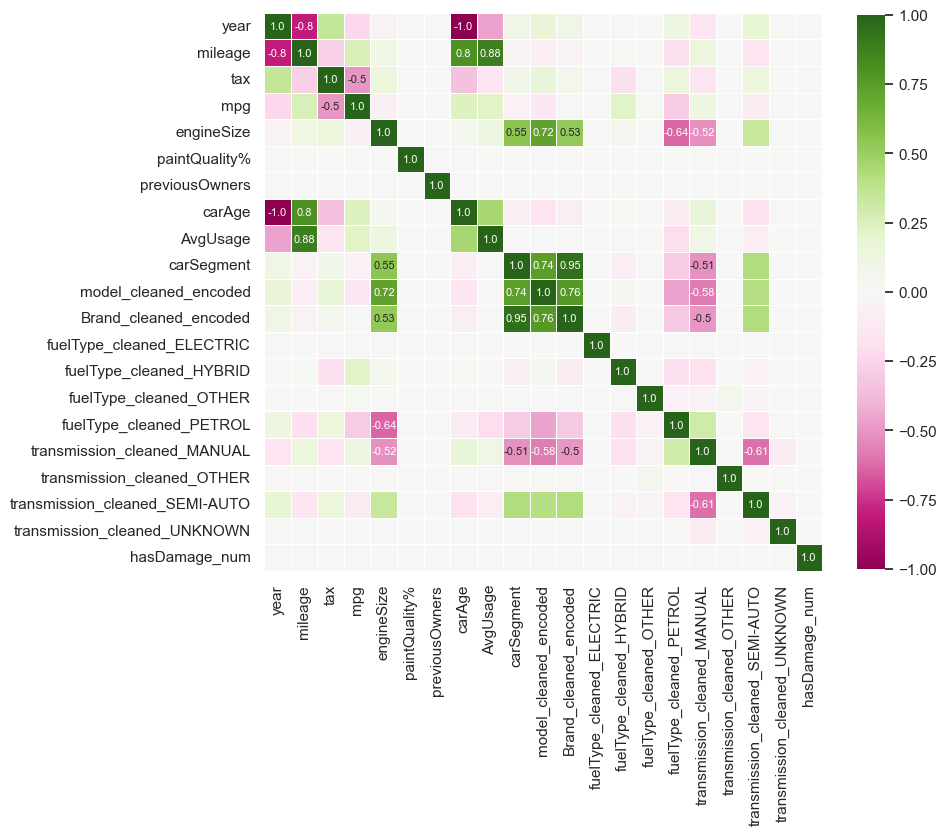

In [338]:
corr = X_train_scaled.select_dtypes(include=np.number).corr(method="spearman").round(2)

mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, 
                 np.round(corr.values, 2),  
                 np.full(corr.shape, ""))

plt.figure(figsize=(9,8))
sns.heatmap(data=corr, 
            annot=annot,
            fmt='', 
            vmin=-1, vmax=1, 
            center=0,
            square=True,
            linewidths=.5,
            cmap='PiYG', 
            cbar_kws={"shrink": 0.9},  
            annot_kws={"size":8}
            )

plt.show()

Regarding the correlations: 

- As expected year and carAge are perfectly correlated. We'll probably drop year because carAge is easier to interpret.

- Brand, model and carSegment are highly correlated. We'll probably keep model and drop one of the other two.

- mileage is highly correlated with carAge (0.8) and AvgUsage (0.88). We'll probably keep carAge and AvgUsage. This way, we don't remove relevant information, since AvgUsage measures mileage per year, and the two variables maintained don't show a high correlation, which is ideal.

- We can see that whether a car is manual or not is correlated (~0.6) with the car model, which makes sense.

One note regarding previously categorical variables: the Chi-square test was performed before encoding and feature engineering, and the results are consistent with those obtained after encoding.

model_cleaned_encoded             0.779469
carAge                           -0.596872
year                              0.596872
transmission_cleaned_MANUAL      -0.593175
Brand_cleaned_encoded             0.578864
engineSize                        0.574271
carSegment                        0.561718
mileage                          -0.520133
transmission_cleaned_SEMI-AUTO    0.443828
AvgUsage                         -0.335674
tax                               0.316024
fuelType_cleaned_PETROL          -0.276342
mpg                              -0.249742
fuelType_cleaned_HYBRID           0.073924
fuelType_cleaned_OTHER            0.011512
previousOwners                    0.006122
transmission_cleaned_OTHER        0.004059
paintQuality%                     0.003721
hasDamage_num                     0.002136
fuelType_cleaned_ELECTRIC         0.001055
transmission_cleaned_UNKNOWN      0.000406
dtype: float64


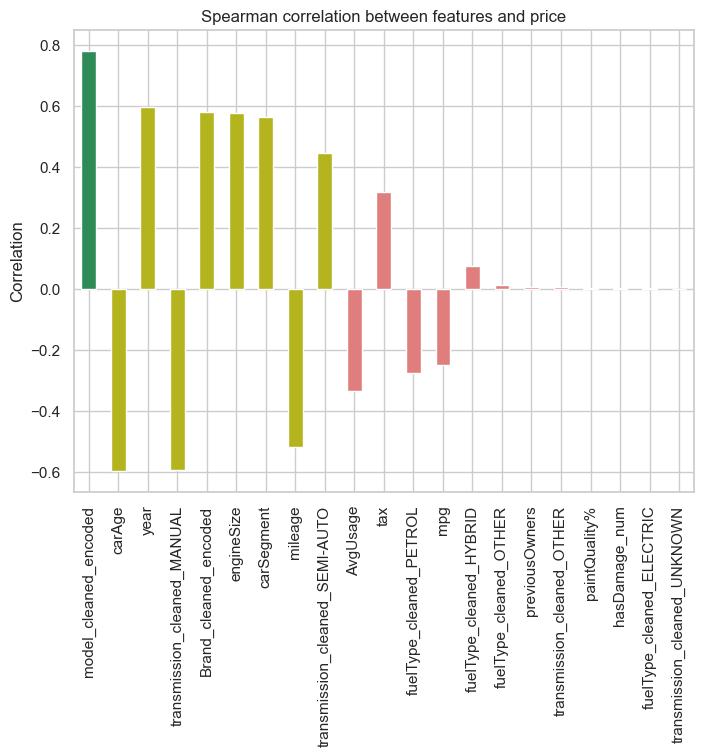

In [339]:
features = X_train_scaled.select_dtypes(include=np.number)
corr_with_price = features.apply(lambda x: x.corr(y_train, method='spearman')).sort_values(key=abs, ascending=False)
print(corr_with_price)

colors = []
for c in corr_with_price:
    if abs(c) >= 0.7:
        colors.append('#2E8B57')  #strong 
    elif abs(c) >= 0.4 and abs(c) <0.7:
        colors.append("#b4b41f")  #medium
    else:
        colors.append('#E07E7E')  #weak

plt.figure(figsize=(8,6))
corr_with_price.plot(kind='bar', color=colors)
plt.title('Spearman correlation between features and price')
plt.ylabel('Correlation')
plt.show()

Regarding the correlations:

- model is the most correlated with the target. We should keep it.
- carAge and year have the same absolute value. We'll only keep one of them.
- The correlations with paintQuality%, previous Owners and hasDamaged are also very low ( less than 0.01) so we should probably drop them.
- As for the one hot encoded variables, the categories that show a low correlation with price are probably not relevant. We could keep all of them or group all these categories into a single category. For now we'll choose the first option.

In [340]:
to_choose= ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage', 'carAge', 'AvgUsage',
       'model_cleaned_encoded', 'Brand_cleaned_encoded', 'carSegment']

In [341]:
X_train_aux = X_train_scaled[to_choose].copy()
X_val_aux = X_val_scaled[to_choose].copy()
df_test_aux = df_test_scaled[to_choose].copy()

In [342]:
X_train_scaled.drop('hasDamage_num', axis=1, inplace=True) 

### **Wrapper methods**

**Base estimator choice**: it's generally a good idea to use an estimator that is similar to the final model you intend to deploy. Since our target is continuous (price) the base estimator should be a regression model, not a classification model.

#### *Linear Regression*

In [343]:
nof_list = np.arange(1, len(X_train_aux.columns) + 1) #creates an array of integers from 1 to the total number of columns in X_train_scaled

high_score = 0 # Variable to store the highest validation score found
nof = 0 # Variable to store the optimum number of features  

# Lists to store training and validation scores
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression() #base estimator
    
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train_aux, y_train) # Fit RFE on the training set and return only the selected features
    
    X_val_rfe = rfe.transform(X_val_aux) # Apply the same feature selection to the validation set (transform only, no fit)
    
    model.fit(X_train_rfe, y_train) # Train the model with the selected features on the training set
    
    train_score = model.score(X_train_rfe, y_train) #R^2
    train_score_list.append(train_score)
    
    val_score = model.score(X_val_rfe, y_val) #R^2
    val_score_list.append(val_score)
    
    if val_score >= high_score:
        high_score = val_score  # Update the best score
        nof = nof_list[n]       # Update the optimum number of features
        features_to_select = pd.Series(rfe.support_, index = X_train_aux.columns)

print(f"Optimum number of features: {nof}")
print(f"Score with {nof} features: {high_score}")
print(f"Features to select:\n{features_to_select}")

Optimum number of features: 13
Score with 13 features: 0.7900527803556683
Features to select:
year                     True
mileage                  True
tax                      True
mpg                      True
engineSize               True
paintQuality%            True
previousOwners           True
hasDamage                True
carAge                   True
AvgUsage                 True
model_cleaned_encoded    True
Brand_cleaned_encoded    True
carSegment               True
dtype: bool


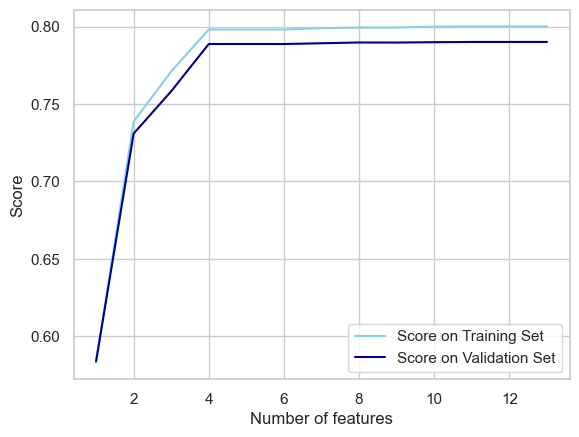

In [344]:
plt.plot(list(range(1,len(nof_list)+1)), train_score_list, label="Score on Training Set", color='skyblue')
plt.plot(list(range(1,len(nof_list)+1)), val_score_list, label="Score on Validation Set", color='darkblue')
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend()
plt.show()

To maintain a balance between precision and complexity, we chose the number of features at which the score stabilizes: ~6 features.

In [345]:
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 6)
X_rfe = rfe.fit_transform(X = X_train_aux, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_aux.columns)
selected_features

year                      True
mileage                   True
tax                      False
mpg                      False
engineSize                True
paintQuality%            False
previousOwners           False
hasDamage                False
carAge                    True
AvgUsage                 False
model_cleaned_encoded     True
Brand_cleaned_encoded    False
carSegment                True
dtype: bool

#### *LASSO*

In [346]:
nof_list = np.arange(1, len(X_train_aux.columns) + 1) #creates an array of integers from 1 to the total number of columns in X_train_scaled

high_score = 0 # Variable to store the highest validation score found
nof = 0 # Variable to store the optimum number of features  

# Lists to store training and validation scores
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = Lasso() #base estimator
    
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train_aux, y_train) # Fit RFE on the training set and return only the selected features
    
    X_val_rfe = rfe.transform(X_val_aux) # Apply the same feature selection to the validation set (transform only, no fit)
    
    model.fit(X_train_rfe, y_train) # Train the model with the selected features on the training set
    
    train_score = model.score(X_train_rfe, y_train) #R^2
    train_score_list.append(train_score)
    
    val_score = model.score(X_val_rfe, y_val) #R^2
    val_score_list.append(val_score)
    
    if val_score >= high_score:
        high_score = val_score  # Update the best score
        nof = nof_list[n]       # Update the optimum number of features
        features_to_select = pd.Series(rfe.support_, index = X_train_aux.columns)

print(f"Optimum number of features: {nof}")
print(f"Score with {nof} features: {high_score}")
print(f"Features to select:\n{features_to_select}")

Optimum number of features: 12
Score with 12 features: 0.7900600558068561
Features to select:
year                      True
mileage                   True
tax                       True
mpg                       True
engineSize                True
paintQuality%             True
previousOwners            True
hasDamage                 True
carAge                   False
AvgUsage                  True
model_cleaned_encoded     True
Brand_cleaned_encoded     True
carSegment                True
dtype: bool


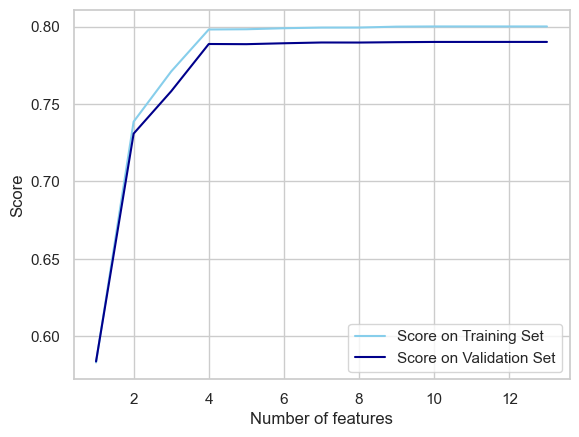

In [347]:
plt.plot(list(range(1,len(nof_list)+1)), train_score_list, label="Score on Training Set", color='skyblue')
plt.plot(list(range(1,len(nof_list)+1)), val_score_list, label="Score on Validation Set", color='darkblue')
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend()
plt.show()

To maintain a balance between precision and complexity, we chose the number of features at which the score stabilizes: ~6 features.

In [348]:
model = Lasso()
rfe = RFE(estimator = model, n_features_to_select = 6)
X_rfe = rfe.fit_transform(X = X_train_aux, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_aux.columns)
selected_features

year                      True
mileage                   True
tax                      False
mpg                      False
engineSize                True
paintQuality%            False
previousOwners           False
hasDamage                False
carAge                   False
AvgUsage                 False
model_cleaned_encoded     True
Brand_cleaned_encoded     True
carSegment                True
dtype: bool

### **Embendded Methods**

#### *LASSO*

Coefficients:
mileage                 -1836.808044
carSegment               -942.206098
AvgUsage                 -367.760178
mpg                      -274.783832
tax                      -109.443031
carAge                    -13.078380
paintQuality%              -5.343453
hasDamage                  -0.000000
previousOwners              6.310145
Brand_cleaned_encoded     966.442928
engineSize               2749.018307
year                     2755.446005
model_cleaned_encoded    4734.100061
dtype: float64

Eliminated variables: ['hasDamage']


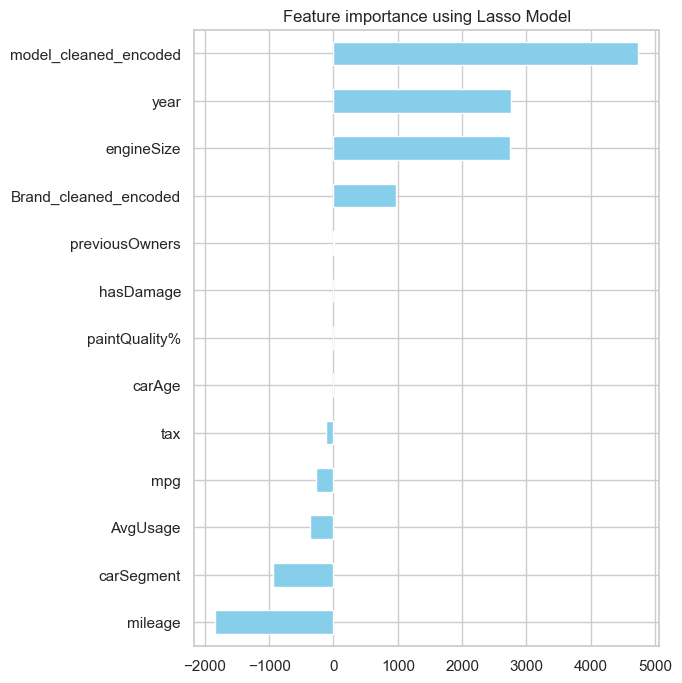

In [349]:
reg = LassoCV()
reg.fit(X_train_aux, y_train)
coef = pd.Series(reg.coef_, index = X_train_aux.columns)
print(f"Coefficients:\n{coef.sort_values()}\n")
print(f"Eliminated variables: {[feat for feat in coef.index if coef[feat]==0]}")
plot_importance(coef.sort_values(),'Lasso')

### **Final Insights**

<hr>

| Predictor | Spearman | RFE LR| RFE LASSO | Lasso | What to do? | 
| --- | --- | --- | --- | --- | --- |
| year | Discard, perfectly correl with carAge | Keep |Keep | Keep | Discard
| mileage | Discard | Keep |Keep| Keep | Include in the model
| tax | Discard | Discard |Discard| Keep | Discard
| mpg | Discard | Discard | Discard | Keep | Discard
| engineSize | Keep? | Keep | Keep | Keep | Include in the model
| paintQuality | Discard | Discard | Discard | Keep | Discard
| previousOwners |Discard |Discard | Discard |  Keep | Discard
| hasDamage |Discard |Discard | Discard |  Discard | Discard
| carAge | Keep |Keep | Discard |  Keep | Include in the model
| AvgUsage |Keep? |Discard | Discard |  Keep | Include in the model
| Brand_cleaned_encoded | Discard |Discard | Keep |  Keep | Include in the model
| model_cleaned_encoded | Keep |Keep | Keep |  Keep | Include in the model
| fuelType_cleaned_encoded |--- |--- | --- |  --- | Include in the model
| transmission_cleaned_encoded | --- |--- | --- |  --- | Include in the model
| carSegment | Keep? | Keep | Keep | Keep | Include in the model


? means it is arguable

<hr>

In [350]:
X_train_scaled.drop(['year', 'tax', 'mpg', 'paintQuality%', 'previousOwners', 'hasDamage'], axis=1, inplace=True)
X_val_scaled.drop(['year', 'tax', 'mpg', 'paintQuality%', 'previousOwners', 'hasDamage'], axis=1, inplace=True)
df_test_scaled.drop(['year', 'tax', 'mpg', 'paintQuality%', 'previousOwners', 'hasDamage'], axis=1, inplace=True)

X_train_scaled.head()

,mileage,engineSize,carAge,AvgUsage,carSegment,model_cleaned_encoded,Brand_cleaned_encoded,fuelType_cleaned_ELECTRIC,fuelType_cleaned_HYBRID,fuelType_cleaned_OTHER,fuelType_cleaned_PETROL,transmission_cleaned_MANUAL,transmission_cleaned_OTHER,transmission_cleaned_SEMI-AUTO,transmission_cleaned_UNKNOWN
carID,,,,,,,,,,,,,,,
42904,0.336529,2.604060,0.048970,0.546568,3,1.559878,1.452509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65965,-0.533377,0.661415,-0.936003,0.177663,2,0.646924,0.004057,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69226,-0.906242,0.272885,-0.443517,-0.986483,2,-0.023970,0.004057,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36037,-0.846949,0.661415,-0.936003,-0.643368,3,2.179278,1.452509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1129,-1.049808,0.661415,-0.936003,-1.174519,3,0.952349,1.134662,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#
<h2 id="6th-bullet" style="background-color: #f7d888ff; color: #da6919ff; padding: 5px; margin: 5px;">
  <strong> 3. Modeling </strong>
</h2>

In [351]:
linear_regression = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0, max_iter=10000)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
huber_model = HuberRegressor(epsilon=1.35, alpha = 0.0001, max_iter=100)

In [352]:
linear_regression.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
elastic_net_model.fit(X_train_scaled, y_train)
huber_model.fit(X_train_scaled, y_train)

HuberRegressor()

In [353]:
y_pred_linear_train = linear_regression.predict(X_train_scaled)
y_pred_linear_val = linear_regression.predict(X_val_scaled)
y_pred_ridge_train = ridge_model.predict(X_train_scaled)
y_pred_ridge_val = ridge_model.predict(X_val_scaled)
y_pred_lasso_train = lasso_model.predict(X_train_scaled)
y_pred_lasso_val = lasso_model.predict(X_val_scaled)
y_pred_elastic_net_train = elastic_net_model.predict(X_train_scaled)
y_pred_elastic_net_val = elastic_net_model.predict(X_val_scaled)
y_pred_huber_train = huber_model.predict(X_train_scaled)
y_pred_huber_val = huber_model.predict(X_val_scaled)

In [354]:
# Here we can compare the  predictions from the different models
real_vs_pred_val = pd.DataFrame({'y_true': y_val.values.flatten(), 'y_pred_linear': y_pred_linear_val.flatten(), 'y_pred_ridge': y_pred_ridge_val.flatten(), 'y_pred_lasso' : y_pred_lasso_val.flatten(), 'y_pred_elastic_net': y_pred_elastic_net_val.flatten(), 'y_pred_huber': y_pred_huber_val.flatten()}, 
                           index=y_val.index #ensures we can map the predictions to each observation correctly
                           )
real_vs_pred_val

,y_true,y_pred_linear,y_pred_ridge,y_pred_lasso,y_pred_elastic_net,y_pred_huber
carID,,,,,,
14278,29950,26917.931015,26918.204359,26922.435649,26625.439413,26237.188809
56641,10698,13791.685385,13791.669188,13791.868067,13587.075237,13325.415771
2172,16490,18216.555992,18216.336793,18211.194157,17903.146210,17746.676803
59953,9999,10111.606863,10112.059513,10125.754381,11270.285779,10332.919474
38177,36995,33019.558144,33019.776927,33024.345991,30354.089722,31870.452948
...,...,...,...,...,...,...
75427,14000,13124.179839,13124.165901,13124.206587,14312.542737,12519.965379
41842,9000,8857.532990,8857.816636,8851.591947,11792.776867,9363.250180
2104,11299,12606.084526,12605.758899,12602.646078,13810.126153,12042.409163


In [355]:
print(f"\nIntercept Linear Model: {linear_regression.intercept_:.2f}")
print(f"\nIntercept Ridge Model: {ridge_model.intercept_:.2f}")
print(f"\nIntercept Lasso Model: {lasso_model.intercept_:.2f}")
print(f"\nIntercept Elastic Net Model: {elastic_net_model.intercept_:.2f}")
print(f"\nIntercept Huber Model: {huber_model.intercept_:.2f}")


Intercept Linear Model: 18223.39

Intercept Ridge Model: 18223.20

Intercept Lasso Model: 18180.46

Intercept Elastic Net Model: 16199.46

Intercept Huber Model: 18197.69


In [356]:
linear_coefs = pd.DataFrame({'coef_linear': linear_regression.coef_, 'coef_ridge': ridge_model.coef_, 'coef_lasso': lasso_model.coef_, 'coef_elast': elastic_net_model.coef_, 'coef_huber': huber_model.coef_}, 
                           index=X_train_scaled.columns)
linear_coefs

,coef_linear,coef_ridge,coef_lasso,coef_elast,coef_huber
mileage,-1407.002781,-1407.163944,-1410.887160,-1465.309484,-225.832772
engineSize,3053.833593,3053.678697,3049.490781,2146.089646,2405.652321
carAge,-2875.538996,-2875.413811,-2872.783479,-2062.444426,-3224.083281
AvgUsage,-462.529762,-462.475548,-460.259259,-539.794420,-1272.157704
carSegment,-1119.062798,-1118.552148,-1089.897920,493.228372,-1095.574308
model_cleaned_encoded,4728.245819,4728.058905,4729.001178,2852.638956,4382.709308
Brand_cleaned_encoded,902.945331,902.530560,877.103079,791.325186,916.909084
fuelType_cleaned_ELECTRIC,769.850624,615.259410,0.000000,-0.000000,105.796921
fuelType_cleaned_HYBRID,1855.766587,1853.947533,1811.503553,98.540929,1508.768864
fuelType_cleaned_OTHER,2091.051791,2072.351490,1608.395263,3.733747,1669.479084


In [357]:
n_train = len(y_train)
p_train = len(X_train_scaled.columns)

n_val = len(y_val)
p_val = len(X_val_scaled.columns)

In [358]:
# Create comparison dataframe
comparison_models = pd.DataFrame({
    'Model': ['OLS', 'Ridge', 'Lasso', 'Elastic net', 'Huber Regressor'],
    'Train R²': [
        r2_score(y_train, y_pred_linear_train),
        r2_score(y_train, y_pred_ridge_train),
        r2_score(y_train, y_pred_lasso_train),
        r2_score(y_train, y_pred_elastic_net_train),
        r2_score(y_train, y_pred_huber_train)
    ],
    'Val R²': [
        r2_score(y_val, y_pred_linear_val),
        r2_score(y_val, y_pred_ridge_val),
        r2_score(y_val, y_pred_lasso_val),
        r2_score(y_val, y_pred_elastic_net_val),
        r2_score(y_val, y_pred_huber_val)
    ],
    'Train Adjusted R²': [
        adjusted_r2(r2_score(y_train, y_pred_linear_train), n_train, p_train),
        adjusted_r2(r2_score(y_train, y_pred_ridge_train), n_train, p_train),
        adjusted_r2(r2_score(y_train, y_pred_lasso_train), n_train, p_train),
        adjusted_r2(r2_score(y_train, y_pred_elastic_net_train), n_train, p_train),
        adjusted_r2(r2_score(y_train, y_pred_huber_train), n_train, p_train)
    ],
    'Val Adjusted R²': [
        adjusted_r2(r2_score(y_val, y_pred_linear_val), n_val, p_val),
        adjusted_r2(r2_score(y_val, y_pred_ridge_val), n_val, p_val),
        adjusted_r2(r2_score(y_val, y_pred_lasso_val), n_val, p_val),
        adjusted_r2(r2_score(y_val, y_pred_elastic_net_val), n_val, p_val),
        adjusted_r2(r2_score(y_val, y_pred_huber_val), n_val, p_val)
    ],
    'Train MAE': [
        mean_absolute_error(y_train, y_pred_linear_train),
        mean_absolute_error(y_train, y_pred_ridge_train),
        mean_absolute_error(y_train, y_pred_lasso_train),
        mean_absolute_error(y_train, y_pred_elastic_net_train),
        mean_absolute_error(y_train, y_pred_huber_train)
    ],
    'Val MAE': [
        mean_absolute_error(y_val, y_pred_linear_val),
        mean_absolute_error(y_val, y_pred_ridge_val),
        mean_absolute_error(y_val, y_pred_lasso_val),
        mean_absolute_error(y_val, y_pred_elastic_net_val),
        mean_absolute_error(y_val, y_pred_huber_val)
    ],
    'Train RMSE': [
        root_mean_squared_error(y_train, y_pred_linear_train),
        root_mean_squared_error(y_train, y_pred_ridge_train),
        root_mean_squared_error(y_train, y_pred_lasso_train),
        root_mean_squared_error(y_train, y_pred_elastic_net_train),
        root_mean_squared_error(y_train, y_pred_huber_train)
    ],
    'Val RMSE': [
        root_mean_squared_error(y_val, y_pred_linear_val),
        root_mean_squared_error(y_val, y_pred_ridge_val),
        root_mean_squared_error(y_val, y_pred_lasso_val),
        root_mean_squared_error(y_val, y_pred_elastic_net_val),
        root_mean_squared_error(y_val, y_pred_huber_val)
    ],
    'Train MedAE': [
        median_absolute_error(y_train, y_pred_linear_train),
        median_absolute_error(y_train, y_pred_ridge_train),
        median_absolute_error(y_train, y_pred_lasso_train),
        median_absolute_error(y_train, y_pred_elastic_net_train),
        median_absolute_error(y_train, y_pred_huber_train)
    ],
    'Val MedAE': [
        median_absolute_error(y_val, y_pred_linear_val),
        median_absolute_error(y_val, y_pred_ridge_val),
        median_absolute_error(y_val, y_pred_lasso_val),
        median_absolute_error(y_val, y_pred_elastic_net_val),
        median_absolute_error(y_val, y_pred_huber_val)
    ],
    'Train MAPE': [
        mean_absolute_percentage_error(y_train, y_pred_linear_train),
        mean_absolute_percentage_error(y_train, y_pred_ridge_train),
        mean_absolute_percentage_error(y_train, y_pred_lasso_train),
        mean_absolute_percentage_error(y_train, y_pred_elastic_net_train),
        mean_absolute_percentage_error(y_train, y_pred_huber_train)
    ],
    'Val MAPE': [
        mean_absolute_percentage_error(y_val, y_pred_linear_val),
        mean_absolute_percentage_error(y_val, y_pred_ridge_val),
        mean_absolute_percentage_error(y_val, y_pred_lasso_val),
        mean_absolute_percentage_error(y_val, y_pred_elastic_net_val),
        mean_absolute_percentage_error(y_val, y_pred_huber_val)
    ],
})

print("Model Comparison:")
comparison_models

Model Comparison:


,Model,Train R²,Val R²,Train Adjusted R²,Val Adjusted R²,Train MAE,Val MAE,Train RMSE,Val RMSE,Train MedAE,Val MedAE,Train MAPE,Val MAPE
0,OLS,0.812803,0.802633,0.812751,0.802503,2579.787057,2646.123514,4163.926150,4440.425643,1817.976375,1821.030832,0.187140,0.190023
1,Ridge,0.812803,0.802632,0.812751,0.802502,2579.767365,2646.110688,4163.926485,4440.437867,1817.620991,1821.245329,0.187137,0.190020
2,Lasso,0.812795,0.802613,0.812742,0.802483,2579.574443,2645.909891,4164.017200,4440.651718,1817.555299,1821.428183,0.187096,0.189979
3,Elastic net,0.764623,0.749615,0.764557,0.749450,2809.408183,2881.872219,4669.132496,5001.406178,1986.622962,2000.426865,0.183586,0.185660
4,Huber Regressor,0.801790,0.789969,0.801734,0.789831,2485.890128,2556.573942,4284.662870,4580.672619,1649.443883,1661.914542,0.167366,0.170088


The higher the R2 the better the model fits the data. It measures the amount of variance in the target that can be explained by the model. It always increases with the number of independent variables so I compute the adjusted R2 to confirm that we are not putting too many features in the model. For the following metrics, the closer to 0.0 the better.

Now to explain the how distance our prediction is from the true value we will use MAE, its a good metric and it is also the metric that will be used to evaluate the results in the kaggle competition. The best possible value is 0.0. Measures Errors in an Uniform Manner: Useful in problems where the magnitude of the error is not particularly relevant (although this particular point  is a disadvantage when magnitude is relevant). Since our goal is to predict car prices the magnitude of the error is a big factor, it is very differnt to predict a price of 2000 and 20000. 

For interpretability purposes and because it is easily communicated to stakeholders, we will also compute MAPE. One of the disadvantages of this metric is that when actual values are close to zero, even small absolute errors can result in very large percentage errors, but in the train data set at least, the minimum value of the target is 450, so we will not encounter this problem.

To adress the problem with MAE we will also compute RSME, however we need to consider that this metric is very sensitive to outliers and that it lacks interpretabibilty

We wil also compute MedAE since the data set contains extreme values. Its very useful in the presence of outliers which is the case of this data set.

MAE, MedAE, and Adjusted R² were prioritized. MAE was considered for interpretability, as it expresses the average prediction error in the same unit as the target variable. MedAE was selected for its robustness to outliers, while Adjusted R² provides the amount of variance that is captured by the model

In light of this, we select Huber Regressor.

In [179]:
residuals_huber = y_val - y_pred_huber_val

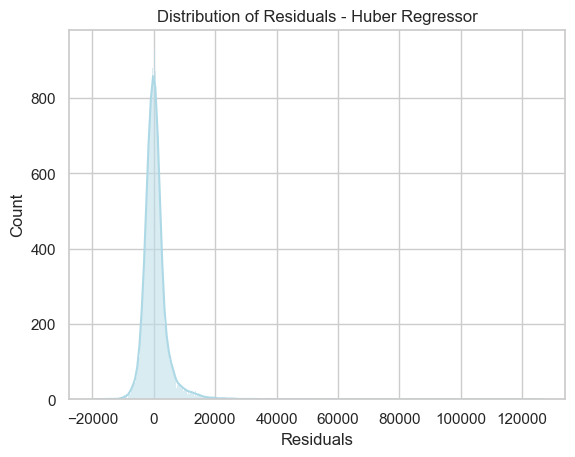

In [180]:
sns.histplot(residuals_huber, kde=True, color="lightblue")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals - Huber Regressor")
plt.show()

The plot is centered around 0, which means the model’s predictions are unbiased (it doesn’t systematically over- or under-estimate)

Roughly symmetric and bell-shaped that suggests residuals are approximately normally distributed, which is ideal for linear regression assumptions.

Skewed to the right which indicates a few large positive errors — the model occasionally underestimates high prices.

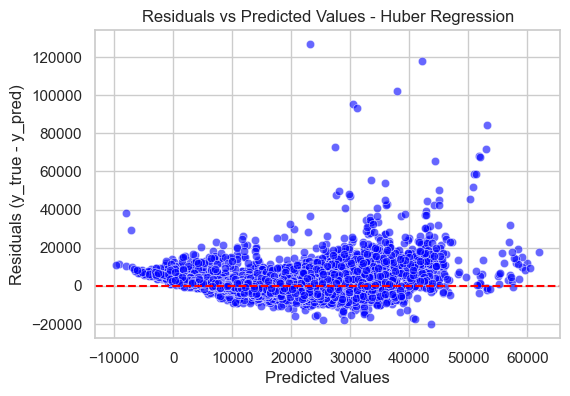

In [181]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_huber_val, y=residuals_huber, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residuals vs Predicted Values - Huber Regression")
plt.show()

#
<h2 id="7th-bullet" style="background-color: #f7d888ff; color: #da6919ff; padding: 5px; margin: 5px;">
  <strong> 4. Deployment </strong>
</h2>

In [182]:
final_model = huber_model
y_test = pd.DataFrame(final_model.predict(df_test_scaled), index=df_test_scaled.index, columns=['price'])
y_test

,price
carID,
89856,13293.290111
106581,22365.248310
80886,15995.941959
100174,18410.094519
81376,21314.653036
...,...
105775,17276.024788
81363,32098.882744
76833,29925.827244


In [183]:
y_test.to_csv("huber_predictions.csv")